# <center> Predicción de atraso de vuelos desde el Aeropuerto Arturo Merino Benítez, Santiago, Chile (SCL)



## Problema
El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila
corresponde a un vuelo que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:
- Fecha-I : Fecha y hora programada del vuelo.
- Vlo-I : Número de vuelo programado.
- Ori-I : Código de ciudad de origen programado.
- Des-I : Código de ciudad de destino programado.
- Emp-I : Código aerolínea de vuelo programado.
- Fecha-O : Fecha y hora de operación del vuelo.
- Vlo-O : Número de vuelo de operación del vuelo.
- Ori-O : Código de ciudad de origen de operación
- Des-O : Código de ciudad de destino de operación.
- Emp-O : Código aerolínea de vuelo operado.
- DIA : Día del mes de operación del vuelo.
- MES : Número de mes de operación del vuelo
- AÑO : Año de operación del vuelo.
- DIANOM : Día de la semana de operación del vuelo.
- TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.
- OPERA : Nombre de aerolínea que opera.
- SIGLAORI : Nombre ciudad origen.
- SIGLADES : Nombre ciudad destino.


## Procesamiento y exploración de datos 

### Librerias y Configuración
- Se importan todas las librerías a ser usadas para resolver el problema. Además, se agregan settings para mostrar múltiples outputs en cada output cell, controlar rows y columns y evitar warnings para ver resultados más claramente.

In [2]:
#libraries y settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',200)
import numpy as np
import seaborn as sns
import glob
from datetime import datetime 
import matplotlib.pyplot as plt
#ignorar warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
#ignorar solamente FutureWarning
#warnings.simplefilter(action='ignore', category=FutureWarning)

### Importar datos 

- Leer datos de vuelos de SCL en formato CSV y convertirlos en el pandas dataframe 'SCL'.
- Ver el contenido de SCL

In [4]:
SCL = pd.read_csv('/Users/victoria/ChallengeDataScientistNeuralWorks/dataset_SCL.csv',sep = ',')
SCL

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


> Observando los datos, se puede deducir que el formato de 'Fecha-I' y 'Fecha-O' es 'Año-Mes-Día hh:mm:ss'. 
Asumiré que todos los vuelos están en la misma zona horaria.

- Obtener información básica de SCL:

In [5]:
#dimensiones de rows x colums
SCL.shape
#tipos de datos en SCL
SCL.dtypes

(68206, 18)

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

> - Las dimensiones de SCL son 68206 rows X 18 columnas. Se observa que sólo 3 variables (DIA,MES,AÑO) tienen formato numérico (int64) y el resto formato 'object'. 
> - Cambio el typo de dato de 'Fecha-I' y 'Fecha-O' a 'datetime' siguiendo el formato 'Año-Mes-Día hh:mm:ss':

In [6]:
format_data = "%Y-%m-%d %H:%M:%S"
SCL['Fecha-O']=pd.to_datetime(SCL['Fecha-O'],format=format_data)
SCL['Fecha-I']=pd.to_datetime(SCL['Fecha-I'],format=format_data)

### Filtrar valores nulos y repetidos 

In [8]:
#mostrar si variables tienen valores nulos
SCL.isnull().any()

Fecha-I      False
Vlo-I        False
Ori-I        False
Des-I        False
Emp-I        False
Fecha-O      False
Vlo-O         True
Ori-O        False
Des-O        False
Emp-O        False
DIA          False
MES          False
AÑO          False
DIANOM       False
TIPOVUELO    False
OPERA        False
SIGLAORI     False
SIGLADES     False
dtype: bool

- Se observa que solamente 'Vlo-O' tiene valores nulos. Las filas con valor nulo son:

In [9]:
SCL.loc[SCL['Vlo-O'].isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


- Elimino row con valor ausente

In [10]:
SCL=SCL.dropna()

- Busco rows duplicadas

In [11]:
SCL[SCL.duplicated()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES


>No hay rows duplicados

## 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?


- Para respoder a esta pregunta:
    - Se generan estadísticas descriptivas de tendecia central, dispersión y forma de la distribución
    - Se visualiza la distribución de los datos con boxplots, violinplots e histplots.

### Estadísticas descriptivas

#### Estadísticas descriptivas de columnas numéricas

- Primero utilizo una versión modificada de la función **'describe'** de pandas para calcular métricas descriptivas de los datos.

In [12]:
# Agrego las estadísticas adicionales 'skew', 'kurt' a la función 'describe'.
# 'skew' (skewness o asimetría) mide la asimetría de la distribución.
# 'kurt' (kurstosis o curtosis) cuantifica el grado de concentración de variables en torno a la media.
def describe(df, stats):
    new_stats = df.describe(datetime_is_numeric=True)
    return new_stats.append(df.reindex(new_stats.columns, axis = 1).agg(stats))
describe(SCL, ['skew', 'kurt'],)

,Fecha-I,Fecha-O,DIA,MES,AÑO
count,68205,68205,68205.000000,68205.000000,68205.000000
mean,2017-07-05 12:14:56.933362688,2017-07-05 12:24:03.590059264,15.714742,6.622667,2017.000029
min,2017-01-01 00:15:00,2017-01-01 00:04:00,1.000000,1.000000,2017.000000
25%,2017-03-31 12:45:00,2017-03-31 12:58:00,8.000000,3.000000,2017.000000
50%,2017-07-10 05:30:00,2017-07-10 05:39:00,16.000000,7.000000,2017.000000
75%,2017-10-08 11:20:00,2017-10-08 11:22:00,23.000000,10.000000,2017.000000
max,2017-12-31 23:55:00,2018-01-01 00:12:00,31.000000,12.000000,2018.000000
std,NaN,NaN,8.782941,3.523281,0.005415
skew,NaN,NaN,0.008455,-0.063142,184.664561
kurt,NaN,NaN,-1.192487,-1.249890,34099.999883


> - **'DIA'** y **'MES'**:
    - tienen un 'skew' en el rango (-0.5, 0.5), indicando que ambas columnas son bastante simétricas y muy levemente desviadas hacia la derecha e izquierda, respectivamente.
    - tienen un, 'kurt' cercano a 1, indicando una distribución ligeramente más plana que la distribución normal
> - **'AÑO'**: 
    - tiene skewnes y kurtosis muy elevados, indicando una distribución muy asimétrica y la presencia de outliers
    - se observa que solamente hay fechas con año 2017 y 2018 y que el 2017 está en la mayoría de las filas (percentil 75%).
    
 Se buscan datos con año 2018:

In [13]:
SCL.loc[SCL['AÑO'].eq(2018)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico


> - 2018 parece ser un outlier. Los vuelos mostrados partieron el último día de 2017 casi a la media noche,y, por el atraso de sus vuelos, terminaron volando en 2018
> - La columna **'AÑO'** no es informativa, por lo que se elimina del dataset:

In [14]:
del SCL['AÑO']

#### Estadísticas descriptivas de columnas categóricas

In [15]:
#'top' es el valor más común
#'freq' es el la frecuencia del valor más común
SCL.describe(include='object')  

,Vlo-I,Ori-I,Des-I,Emp-I,Vlo-O,Ori-O,Des-O,Emp-O,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
count,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205,68205
unique,750,1,64,30,866,1,63,32,7,2,23,1,62
top,174,SCEL,SCFA,LAN,174,SCEL,SCFA,LAN,Viernes,N,Grupo LATAM,Santiago,Buenos Aires
freq,686,68205,5787,37611,649,68205,5786,20988,10292,36966,40892,68205,6335


> Se observs que **'ORI-I'**, **'ORI-O'** y **'SIGLAORI'** poseen un valor único (SCEL, SCEL, y Santiago, respectivamente), por lo tanto no son informativas y se eliminan:


In [16]:
del SCL['Ori-I']
del SCL['Ori-O']
del SCL['SIGLAORI']

### Se visualiza la distribución de los datos usando diferentes tipos de plots


- Countplots de columnas categóricas.

In [17]:
SCL.select_dtypes(include='object')

,Vlo-I,Des-I,Emp-I,Vlo-O,Des-O,Emp-O,DIANOM,TIPOVUELO,OPERA,SIGLADES
0,226,KMIA,AAL,226,KMIA,AAL,Domingo,I,American Airlines,Miami
1,226,KMIA,AAL,226,KMIA,AAL,Lunes,I,American Airlines,Miami
2,226,KMIA,AAL,226,KMIA,AAL,Martes,I,American Airlines,Miami
3,226,KMIA,AAL,226,KMIA,AAL,Miercoles,I,American Airlines,Miami
4,226,KMIA,AAL,226,KMIA,AAL,Jueves,I,American Airlines,Miami
...,...,...,...,...,...,...,...,...,...,...
68201,400,SPJC,JAT,400.0,SPJC,JAT,Viernes,I,JetSmart SPA,Lima
68202,400,SPJC,JAT,400.0,SPJC,JAT,Lunes,I,JetSmart SPA,Lima
68203,400,SPJC,JAT,400.0,SPJC,JAT,Miercoles,I,JetSmart SPA,Lima
68204,400,SPJC,JAT,400.0,SPJC,JAT,Viernes,I,JetSmart SPA,Lima


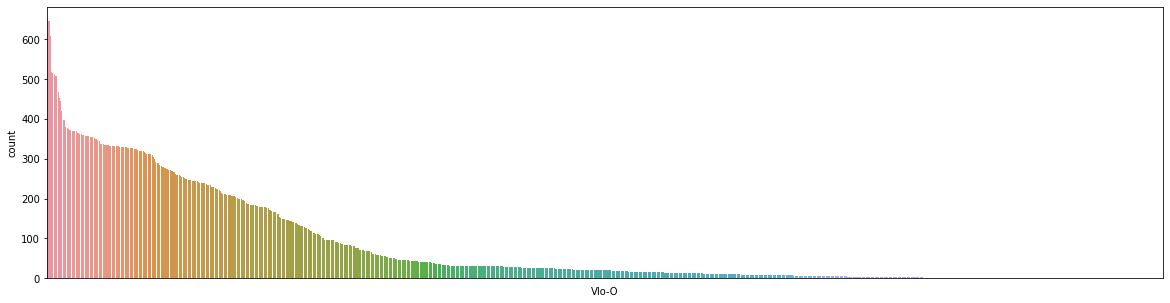

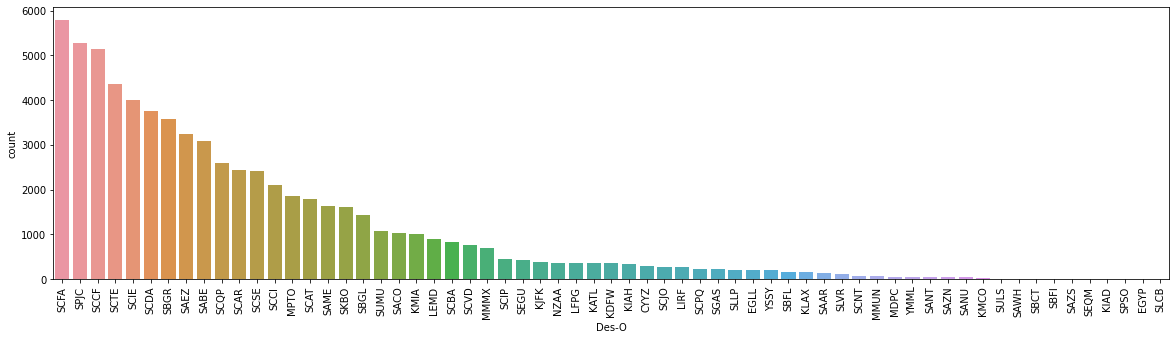

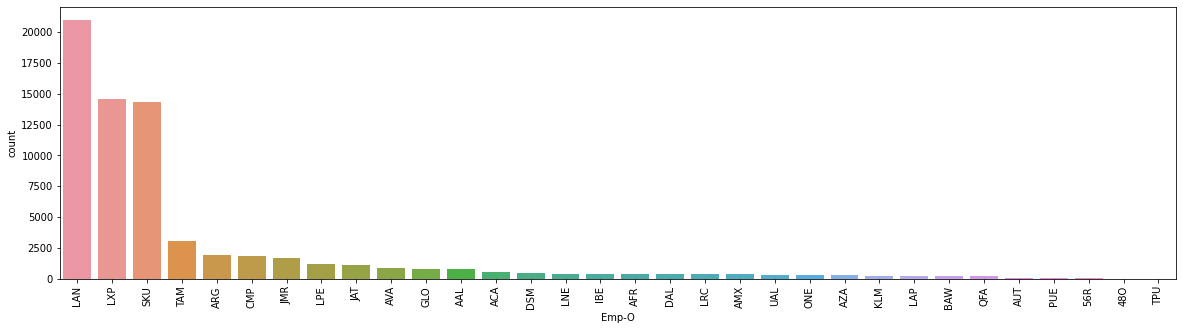

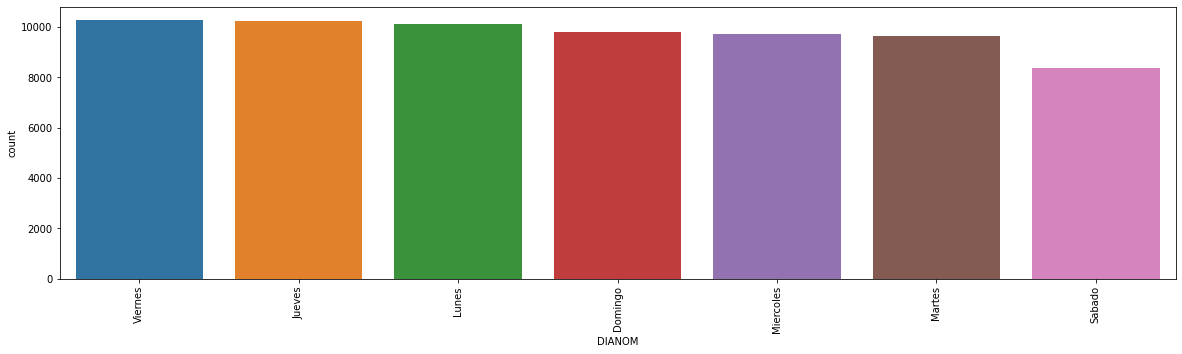

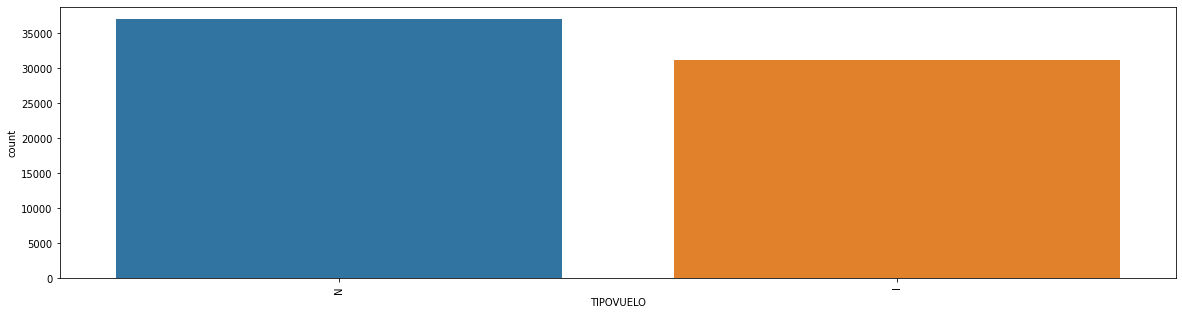

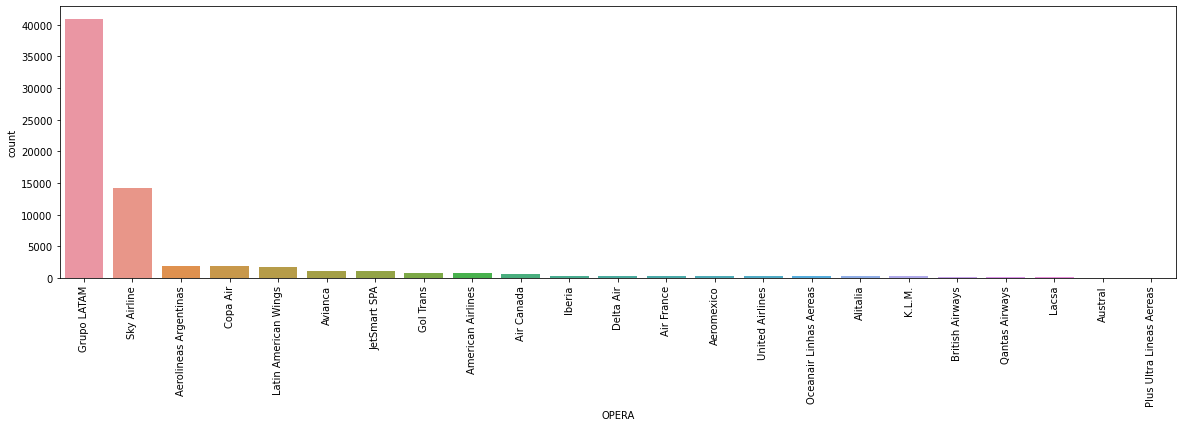

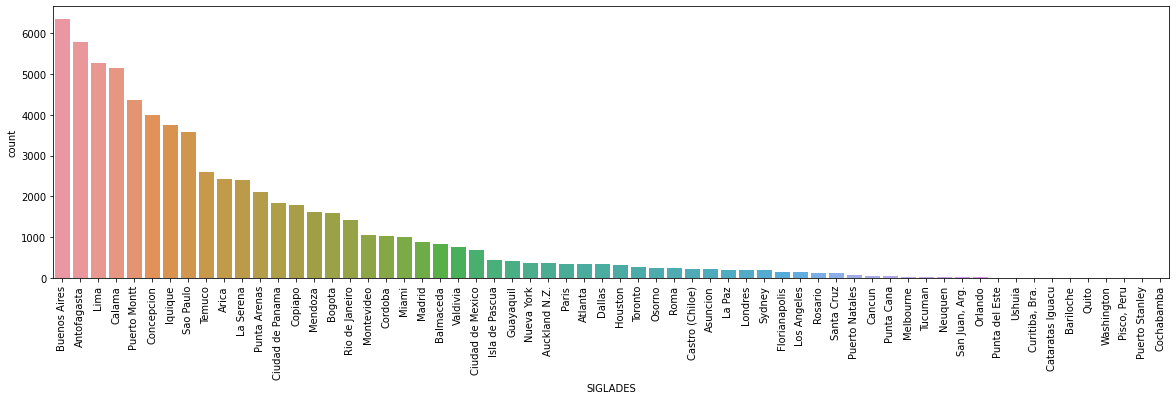

In [18]:
#Plot counts de observaciones de cada columna categorica usando barras
for column in SCL.select_dtypes(include='object'):
    if column=='Vlo-I' or column=='Vlo-O':
        %matplotlib inline
        var=plt.figure(figsize=(20,5))
        var=sns.countplot(x=SCL[column],order = SCL[column].value_counts().index)
        #var.xaxis.set_major_locator(plt.MaxNLocator(100))
        #no mostrar labels porque haymuchos xticks
        var=var.set_xticks([])
        continue
        
    var=plt.figure(figsize=(20,5))
    var=sns.countplot(x=SCL[column],order = SCL[column].value_counts().index)
    #var.xaxis.set_major_locator(plt.MaxNLocator(100))
    var=var.set_xticklabels(var.get_xticklabels(), rotation=90)


> Se observa que la mayoria de las variables no estan balanceadas, excepto DIANOM y TIPOVUELO
El Grupo Latam, seguido de Sky Airline domina la operación de vuelos('OPERA') desde SCL, y la aerolínea LAN lidera vuelos programados y operados y Emp-I y Emp-O.
(Esto también se puede observar en las Estadísticas descriptivas de columnas categóricas)

- Countplots de columnas numéricas.

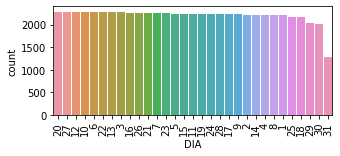

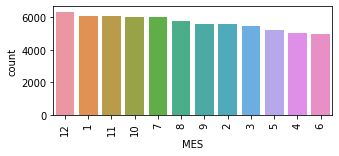

In [19]:
for column in SCL.select_dtypes(include='int64'):
    var=plt.figure(figsize=(5,2))
    var=sns.countplot(x=SCL[column],order = SCL[column].value_counts().index)
    var=var.set_xticklabels(var.get_xticklabels(), rotation=90)

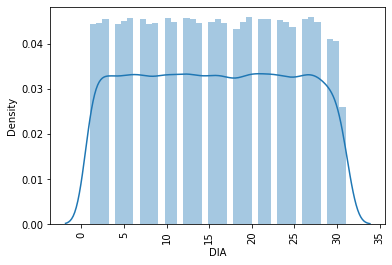

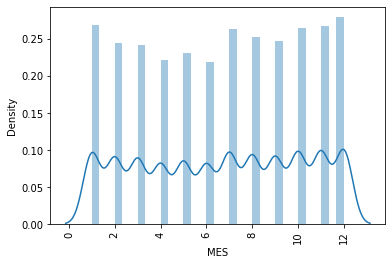

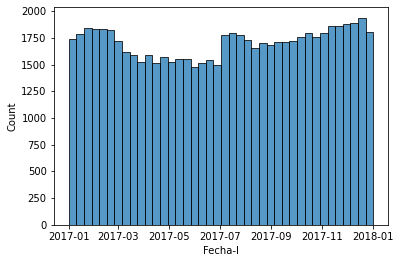

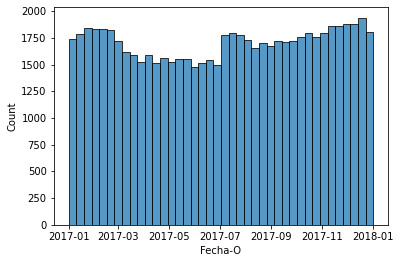

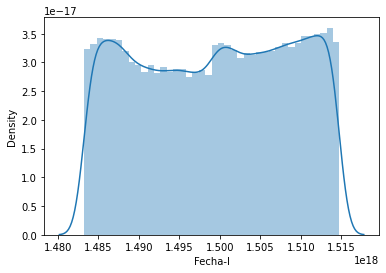

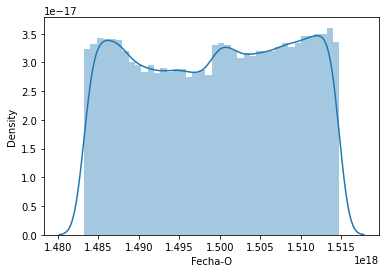

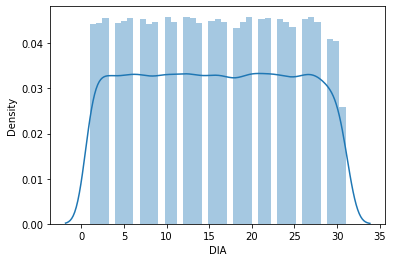

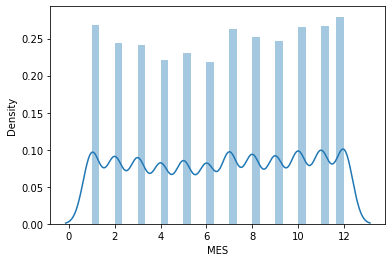

In [20]:
#Nota: dependiendo de la versión de seaborn, puede usar se hisplot en vez de displot
for column in SCL.select_dtypes(include='int').columns:
    var=plt.figure()#figsize=(20,5))
    var=sns.distplot(SCL[column])
    var=var.set_xticklabels(var.get_xticklabels(), rotation=90)


#Nota: dependiendo de la versión de seaborn, puede usar se hisplot con datos datetime.
for column in SCL.select_dtypes(include='datetime').columns:
    var=plt.figure()#figsize=(20,5))
    var=sns.histplot(SCL[column])
    #var=var.set_xticks(var.get_xticks(), rotation=90)  # just get and reset whatever you already have
    #var.set_xticklabels(xtick_labels)  # set the new/modified labels
    #chart=var.set_xticklabels(var.get_xticklabels(), rotation=90)


for column in SCL.select_dtypes(include='datetime').columns:
    var=plt.figure()#figsize=(20,5))
    var=sns.distplot(SCL[column],kde=True)
for column in SCL.select_dtypes(include='int').columns:
    var=plt.figure()#figsize=(20,5))
    var=sns.distplot(SCL[column],kde=True)

- Kernel density estimate (KDE) plots (o kdeplots) de todas las columnas de SCL. Se vizualiza la distribución de las observaciones en cada columna o variable, usando una función de densidad de probabilidad para representar los datos

In [21]:
def plot_kdeplot_dataframe(df):
    #revisar si hay columnas dtypes 'strings', que no se pueden graficar con kdeplot,
    #y convertirlos a object antes de graficar
    for column in df.columns.to_list():
        #print(column)
        var=plt.figure()#figsize=(20,5))
        if df[column].dtype =='string':
            var=sns.kdeplot(df[column].astype('object').value_counts())
        else:
            var=sns.kdeplot(df[column].value_counts())


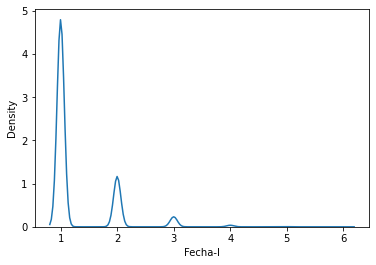

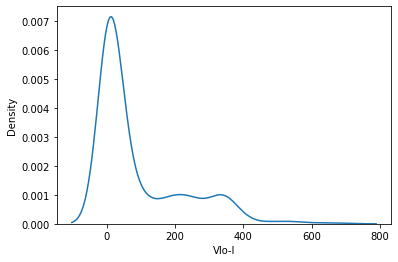

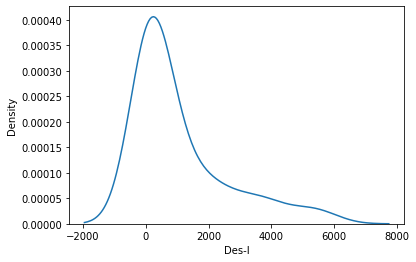

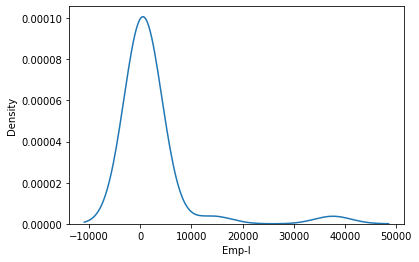

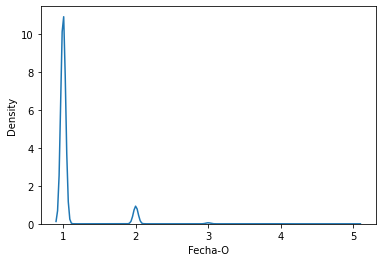

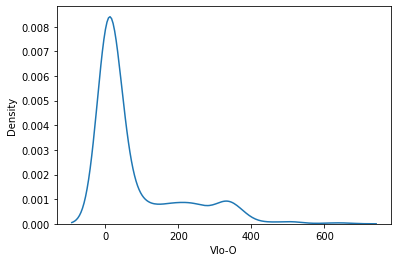

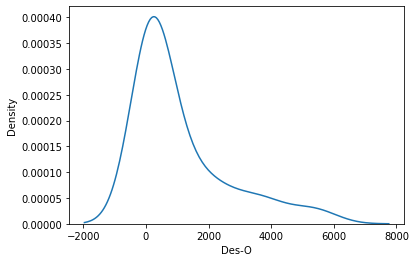

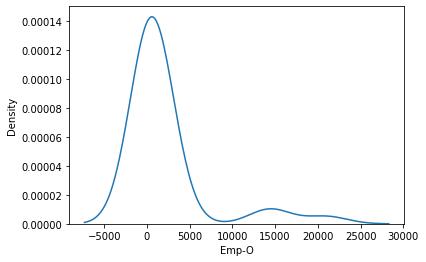

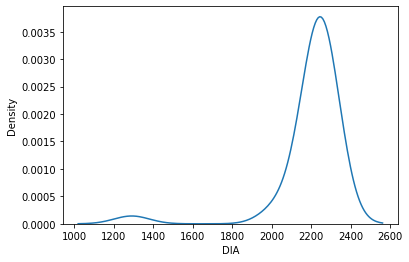

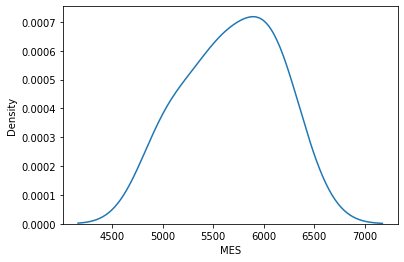

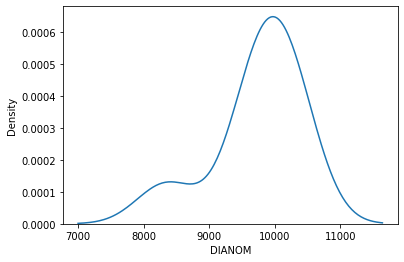

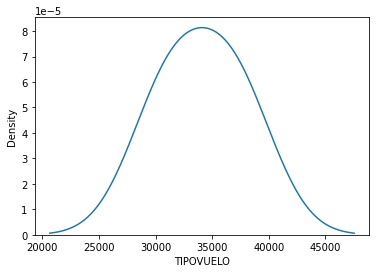

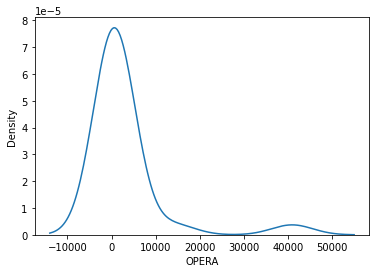

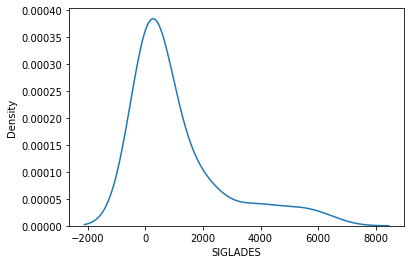

In [22]:
plot_kdeplot_dataframe(SCL)

### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
* temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
* dif_min: diferencia en minutos entre Fecha-O y Fecha-I.
* atraso_15: 1 si dif_min > 15, 0 si no
* periodo_dia: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I


In [23]:
#Generación de columna adicional temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

#15-Dic y 3-Mar
SCL['temporada_alta']=0
#formato datetime es"%Y-%m-%d %H:%M:%S"
inicio = datetime(2017, 12, 15,  0, 0,   0)
fin    = datetime(2017,  3,  3, 23, 59, 59)
#asigno 1 a Fecha-I entre  15-Dic y 3-Mar
SCL.loc[
       SCL['Fecha-I'].le(fin)| SCL['Fecha-I'].ge(inicio) ,
            'temporada_alta'
    ] = 1

# 15-Jul y 31-Jul
inicio = datetime(2017, 7, 15, 0, 0, 0)
fin    = datetime(2017, 7, 31, 23, 59, 59)
SCL.loc[
       SCL['Fecha-I'].le(fin) & SCL['Fecha-I'].ge(inicio),
            'temporada_alta'
       ] = 1

# 11-Sep y 30-Sep
inicio = datetime(2017, 9, 11, 0, 0, 0)#2
fin    = datetime(2017, 9, 30, 23, 59, 59)
SCL.loc[
       SCL['Fecha-I'].le(fin) & SCL['Fecha-I'].ge(inicio),
            'temporada_alta'
       ] = 1


#Generación de columna adicional dif_min: diferencia en minutos entre Fecha-O y Fecha-I.
SCL['dif_min']= SCL['Fecha-O']-SCL['Fecha-I']
SCL['dif_min'] = SCL['dif_min'].dt.total_seconds() / 60
SCL['dif_min'] = SCL['dif_min'].astype('int64') 

#Generación de columna adicional atraso_15: 1 si dif_min > 15, 0 si no
SCL['atraso_15']=0
SCL.loc[
       SCL['dif_min']>15,
            'atraso_15'
       ] = 1

#Generación de columna adicional periodo_dia:
#mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I

#mañana (entre 5:00 y 11:59)
SCL.loc[
         SCL['Fecha-I'].dt.time.ge(pd.to_datetime("05:00:00").time())
       & SCL['Fecha-I'].dt.time.le(pd.to_datetime("11:59:00").time()),
         'periodo_dia'
       ] = 'manana'
#tarde (entre 12:00 y 18:59) y 
SCL.loc[
         SCL['Fecha-I'].dt.time.ge(pd.to_datetime("12:00:00").time())
       & SCL['Fecha-I'].dt.time.le(pd.to_datetime("18:59:00").time()),
            'periodo_dia'
       ] = 'tarde'
#noche (entre 19:00 y 4:59), en base a Fecha-I
SCL.loc[
         SCL['Fecha-I'].dt.time.ge(pd.to_datetime("19:00:00").time())
       | SCL['Fecha-I'].dt.time.le(pd.to_datetime("04:59:00").time()),
             'periodo_dia'
       ] = 'noche'



In [24]:
##Exportar dataframe con columnas adicionales al archivo synthetic_features.csv:
path='~/ChallengeDataScientistNeuralWorks'
SCL.to_csv(path+ "/synthetic_features.csv",sep='\t',index=False)


In [25]:
#vuelvo a observar variables  adicionales
describe(SCL[['temporada_alta','dif_min','atraso_15']], ['skew', 'kurt'])

,temporada_alta,dif_min,atraso_15
count,68205.000000,68205.000000,68205.000000
mean,0.333715,9.110945,0.184942
std,0.471543,19.313514,0.388254
min,0.000000,-14.000000,0.000000
25%,0.000000,-1.000000,0.000000
50%,0.000000,4.000000,0.000000
75%,1.000000,12.000000,0.000000
max,1.000000,161.000000,1.000000
skew,0.705304,3.553938,1.622994
kurt,-1.502591,16.813593,0.634129


> - temporada_alta:
    - tienen un 'skew' de .70, indicando la que la distribución es moderadamente asimétrica y muy sesgada a la derecha.
    - tienen un 'kurt' de -1.5, indicando una distribución más plana que la distribución normal.
> - dif_min:
    - su skewnes es mayor de 3.5 ,lo que indica que la distribución es bastante asimétrica y sesgada a la derecha.
    - su kurtosis es muy elevada, indicando una distribución bastante asimétrica y con presencia de outliers.
> - atraso_15:
    - de acuerdo a su skewness de 1.6 la distribución es levemente asimetrica y sesgada a la derecha.
    - de acuerdo a su kurtosis de 0.6 la distribución es más plana que la distribución normal.

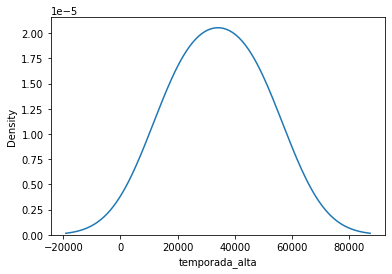

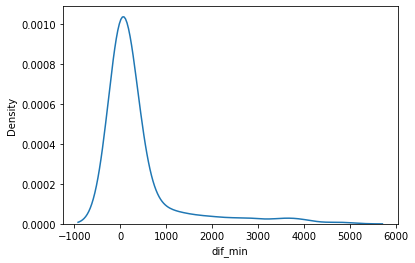

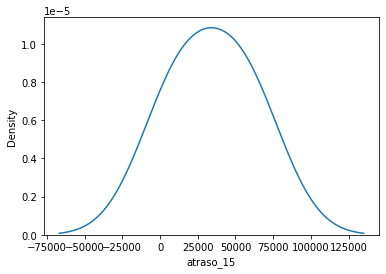

In [26]:
#vuelvo a graficar distribucion de todas las variables
plot_kdeplot_dataframe(SCL[['temporada_alta','dif_min','atraso_15']])

## 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

   - Además de las variables mencionadas (**'Des-I','Des-O', 'OPERA' 'MES', 'DIANOM', 'temporada_alta', 'TIPOVUELO'**), esperaría que **'periodo_dia'** y aeropuertos de salida/destino (**'Emp-I'** y **'Emp-O'**) influyan en el atraso.
   - Agrupo variables de interés por **'atraso_15'** y las grafico
   - Uso violin y boxplots para visualizar como **'Des-I', 'Des-O','OPERA', 'MES', 'DIANOM', 'temporada_alta', 'TIPOVUELO', 'periodo_dia', 'Emp-I', 'Emp-O'** y **'dif_min'** están relacionadas a **'atraso_15'**, 
   - Violinplots y boxplots de la variable continua dif_min estratificada por las variables de interés.
   - Además, hago los mismos plots agrupados por atraso_15

In [27]:
#agrupar variables
#tasa de atraso_15 variables:
variables=['Des-I','Des-O', 'OPERA', 'MES', 'DIANOM', 'temporada_alta', 'TIPOVUELO']
def std(column): 
    return np.std(column)
for variable in variables:
    #mostrar sólo top 5 rows
    SCL.groupby(variable)["atraso_15"].agg(['mean', std, 'sum','count']).sort_values(["count"], ascending = False ).head()

,mean,std,sum,count
Des-I,,,,
SCFA,0.146363,0.353469,847,5787
SPJC,0.230404,0.421092,1214,5269
SCCF,0.122255,0.327580,629,5145
SCTE,0.168465,0.374278,734,4357
SCIE,0.156446,0.363277,625,3995


,mean,std,sum,count
Des-O,,,,
SCFA,0.146388,0.353495,847,5786
SPJC,0.230404,0.421092,1214,5269
SCCF,0.122231,0.327552,629,5146
SCTE,0.168465,0.374278,734,4357
SCIE,0.156023,0.362877,623,3993


,mean,std,sum,count
OPERA,,,,
Grupo LATAM,0.178666,0.383072,7306,40892
Sky Airline,0.177647,0.382215,2540,14298
Aerolineas Argentinas,0.240123,0.427158,468,1949
Copa Air,0.062703,0.242427,116,1850
Latin American Wings,0.407053,0.491285,681,1673


,mean,std,sum,count
MES,,,,
12,0.254091,0.435349,1615,6356
1,0.160144,0.366740,978,6107
11,0.197204,0.397888,1199,6080
10,0.225962,0.418214,1363,6032
7,0.293391,0.455316,1758,5992


,mean,std,sum,count
DIANOM,,,,
Viernes,0.222017,0.415603,2285,10292
Jueves,0.199512,0.399634,2045,10250
Lunes,0.202152,0.401605,2048,10131
Domingo,0.161086,0.367610,1578,9796
Miercoles,0.170850,0.376378,1661,9722


,mean,std,sum,count
temporada_alta,,,,
0,0.179210,0.383528,8144,45444
1,0.196389,0.397266,4470,22761


,mean,std,sum,count
TIPOVUELO,,,,
N,0.150571,0.357630,5566,36966
I,0.225615,0.417987,7048,31239


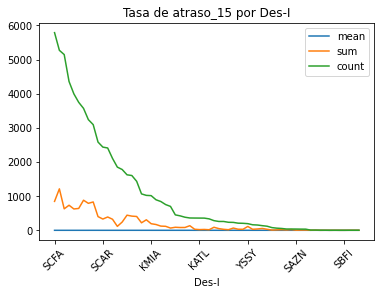

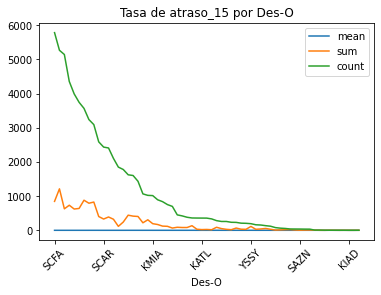

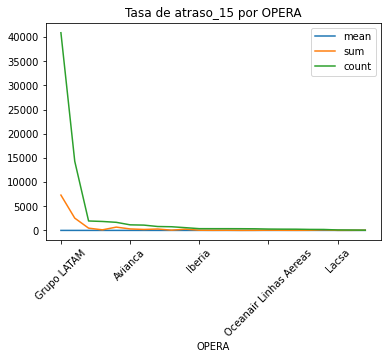

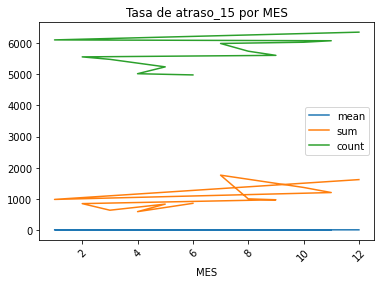

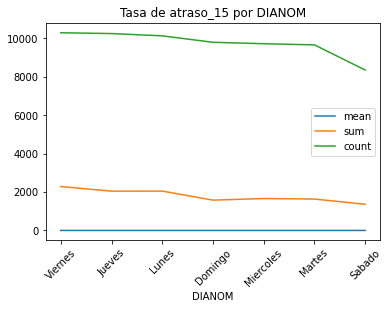

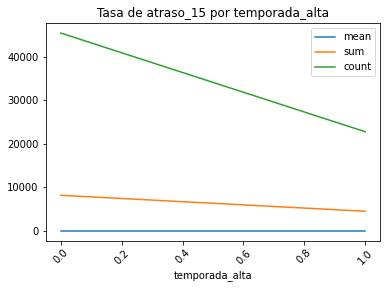

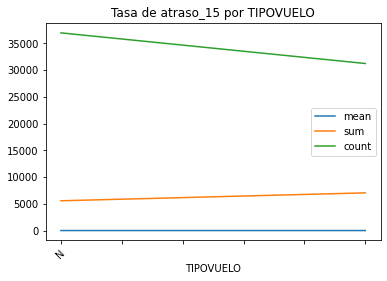

In [28]:
#Gráficos de tasa de atraso_15 por variables de interés agrupadas:
variables=['Des-I','Des-O', 'OPERA', 'MES', 'DIANOM', 'temporada_alta', 'TIPOVUELO']
def std(column): 
    return np.std(column)
for variable in variables:
    fig, ax = plt.subplots()#figsize=(10, 5))
    #asigno el resultado a una variable para evitar mostrar metadata de los plots
    var=SCL.groupby(variable)["atraso_15"].agg(['mean', 'sum','count']).sort_values(["count"], ascending = False).plot(kind='line',legend=True,ax=ax)
   
    var=var.set_xticklabels(var.get_xticklabels(), rotation=45)
    var=plt.title("Tasa de atraso_15 por %s"%variable)



> Se observan los Destinos y aerolíneas más populares

In [29]:
#función para Violinplots
def make_violin(plot_df,label,title,column,rangeR,xvalue,orderlabels,hue=None):
    #orderlabels=plot_df.sort_values(by=columns)[xvalue].unique()
    ax=sns.violinplot(
        x = xvalue,
        y = column,
        data = plot_df,
        #palette='rainbow',
        order=orderlabels,
        hue=hue
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.yticks(np.arange(0,rangeR))
    plt.title('Violinplot de ' + column +' por '+xvalue)
    plt.savefig(title, bbox_inches='tight')
    plt.show()
    plt.close()

#función para Boxplots
def make_boxplot(plot_df,label,title,column,rangeR,xvalue,orderlabels,hue=None):
    ax=sns.boxplot(
        x = xvalue,
        y = column,
        data = plot_df,
        palette='rainbow',
        hue=hue,
        order=orderlabels,
        showmeans=True,
        meanline = True
    )
    ax.set_yscale("log")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    #plt.yticks(np.arange(0,rangeR))
    #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    plt.plot([], [], '--',linewidth=5, color='green', label='mean')
    plt.legend()
    plt.title('Boxplot '+ column +' por '+xvalue)
    #plt.savefig(title)#, bbox_inches='tight')
    plt.show()
    plt.close()

- Primero, grafico Violinplots y Boxplots de 'dif_min' por variable de interés

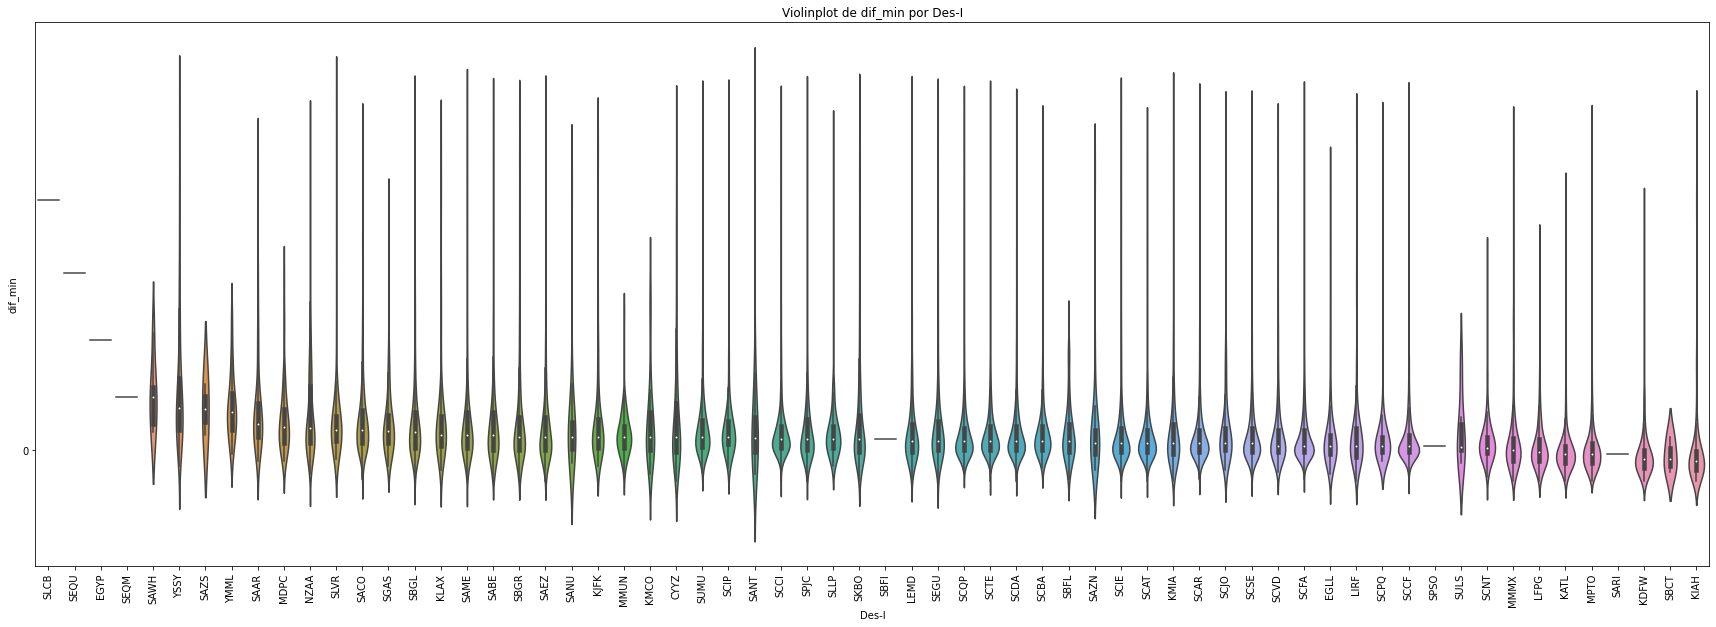

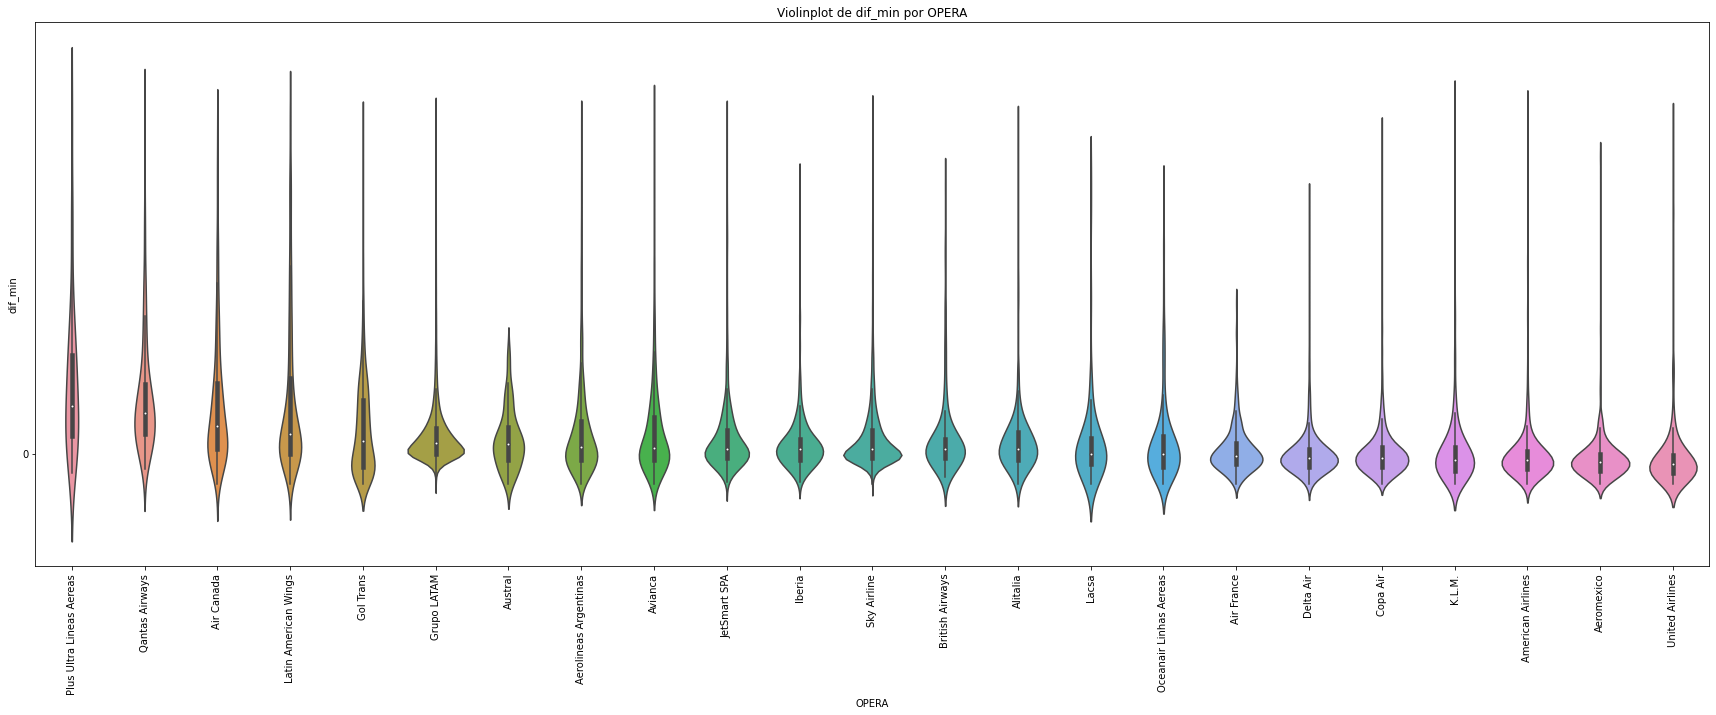

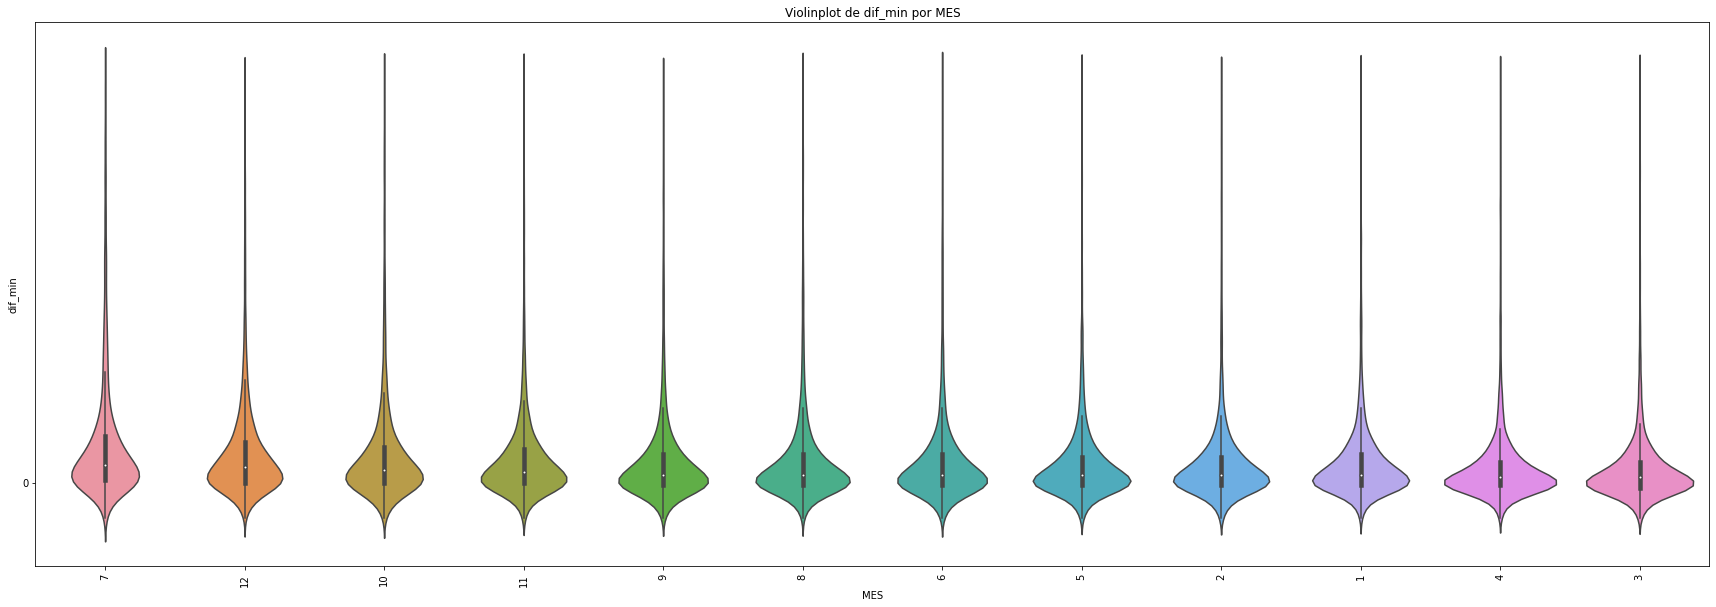

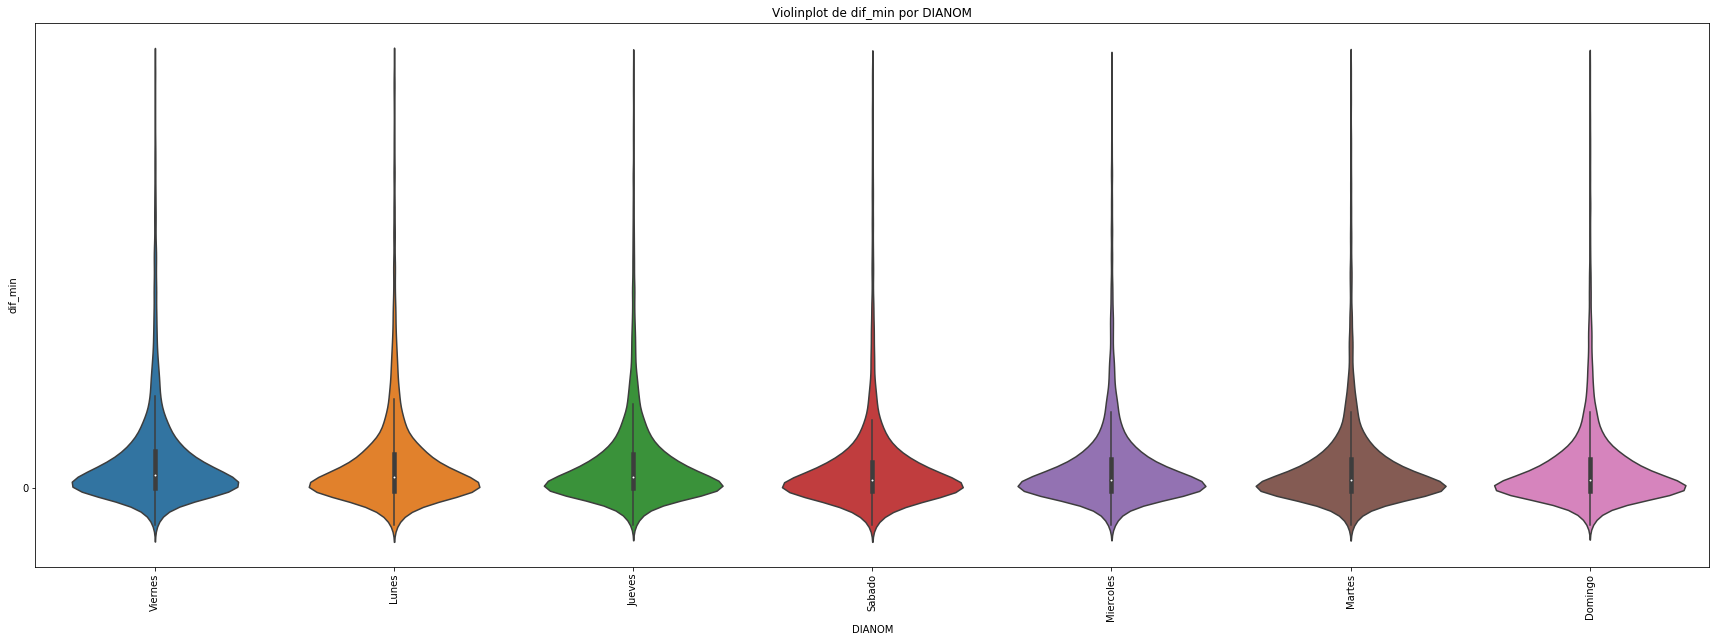

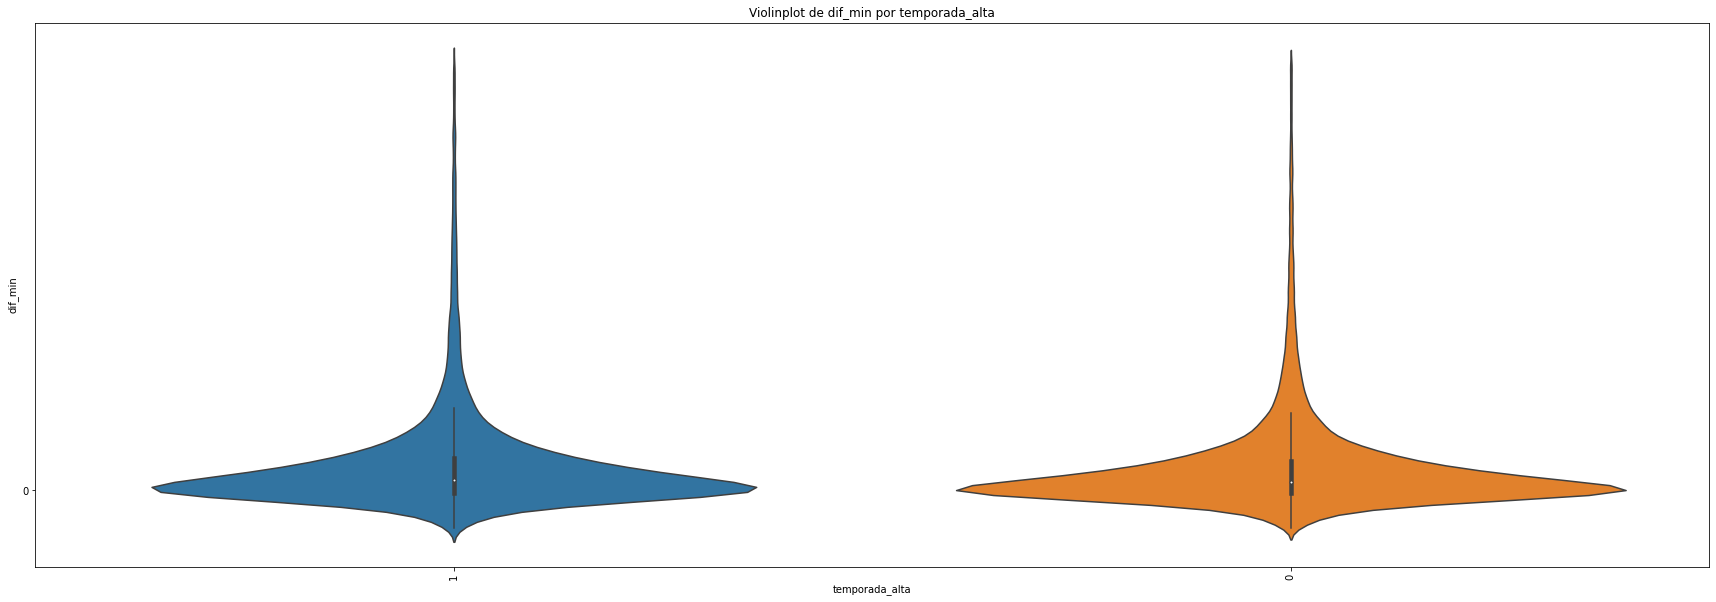

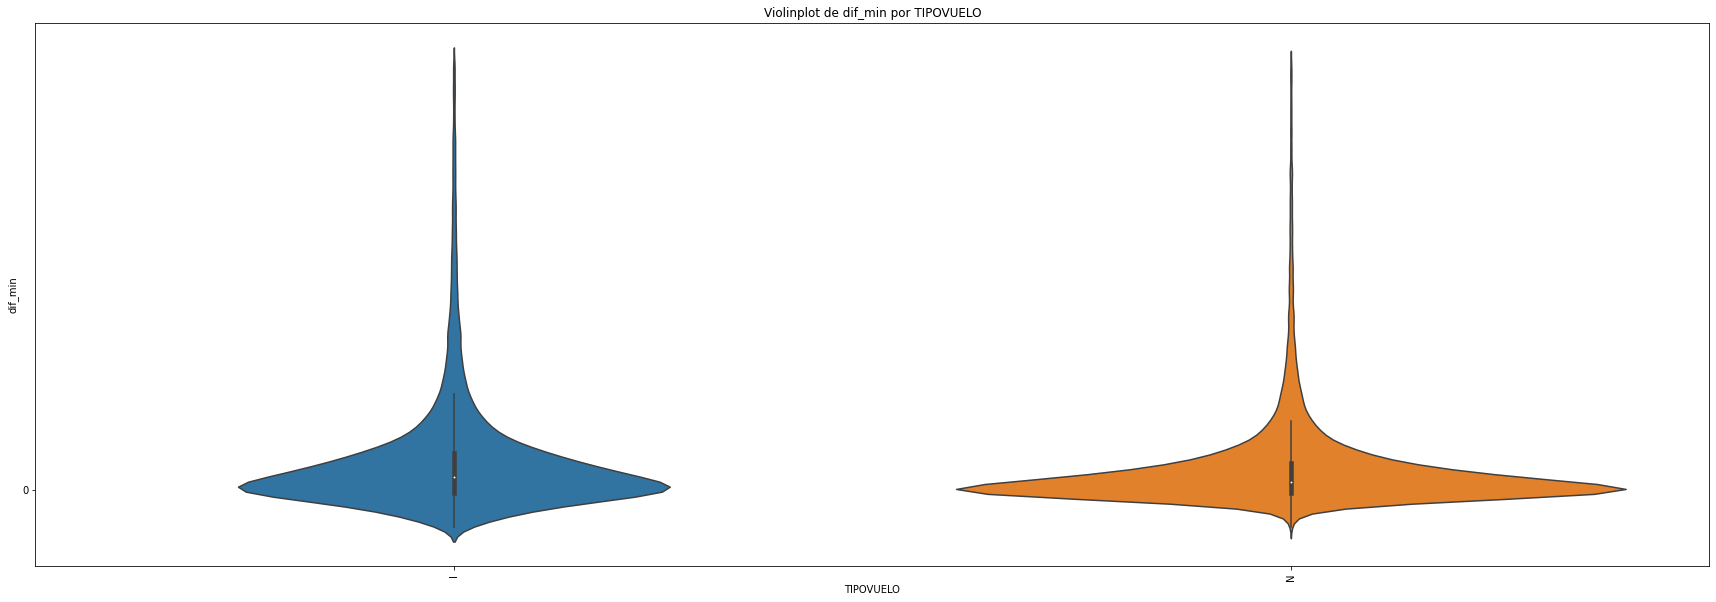

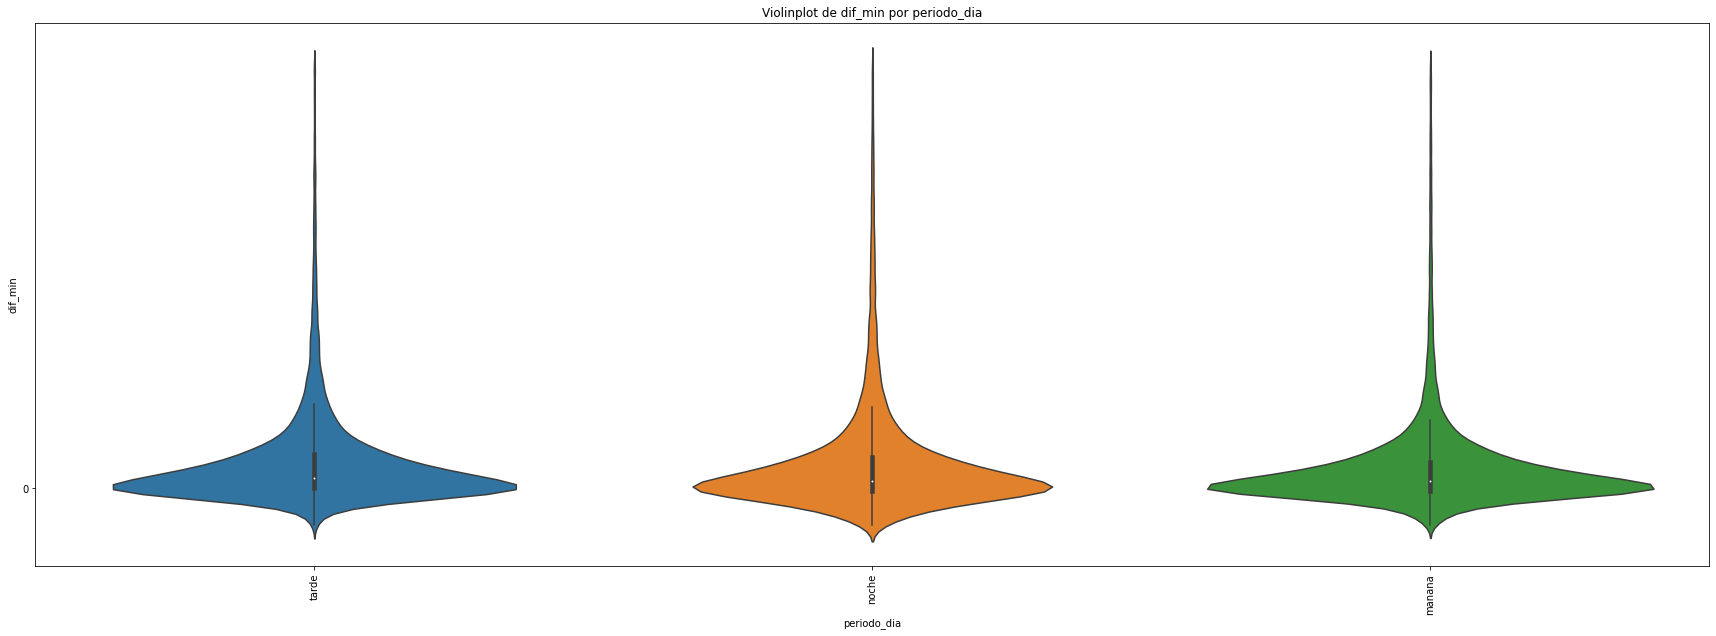

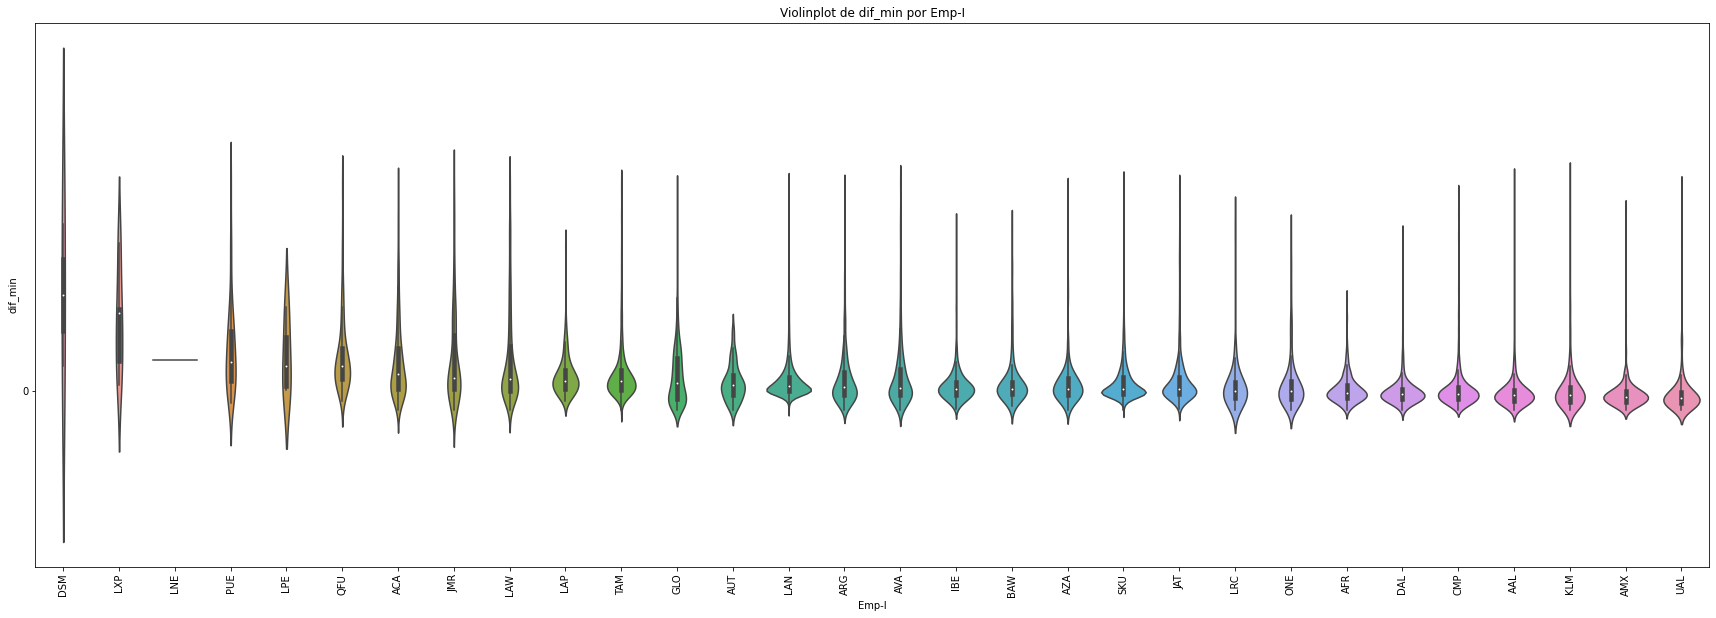

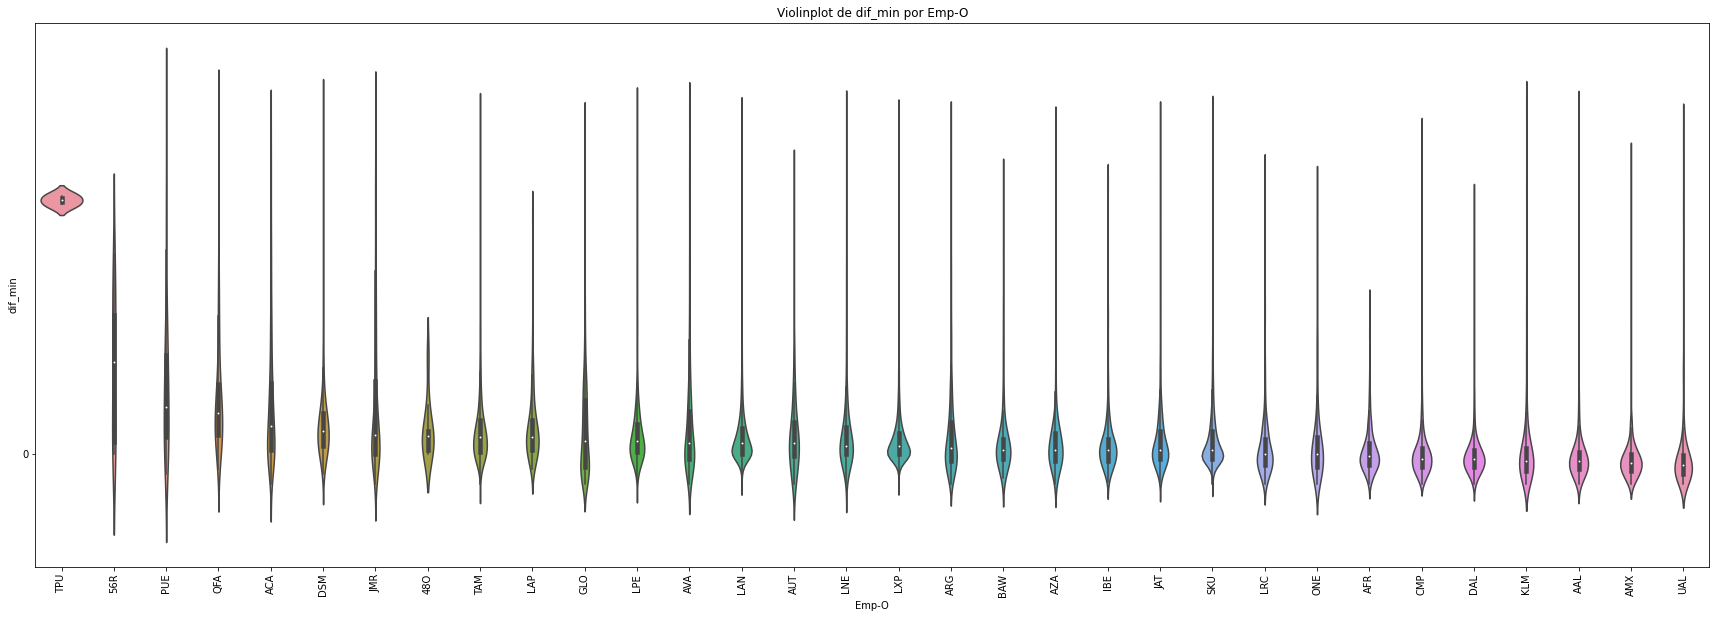

In [30]:
#Violinplots
columnas=['Des-I','OPERA','MES','DIANOM','temporada_alta','TIPOVUELO','periodo_dia','Emp-I','Emp-O']
for variable in columnas:
    rangeR=0.5
    label='SCL'
    xvalue=variable
    column='dif_min'
    title='scl_violin_results_'+ column +xvalue+'.png'
    orderlabels=SCL.groupby(by=[xvalue])[column].median().sort_values(ascending=True).iloc[::-1].index
    #print(           label, title, column,rangeR,xvalue)
    ax = plt.subplots(figsize=(30, 10))
    make_violin(SCL,label, title, column,rangeR,xvalue,orderlabels)

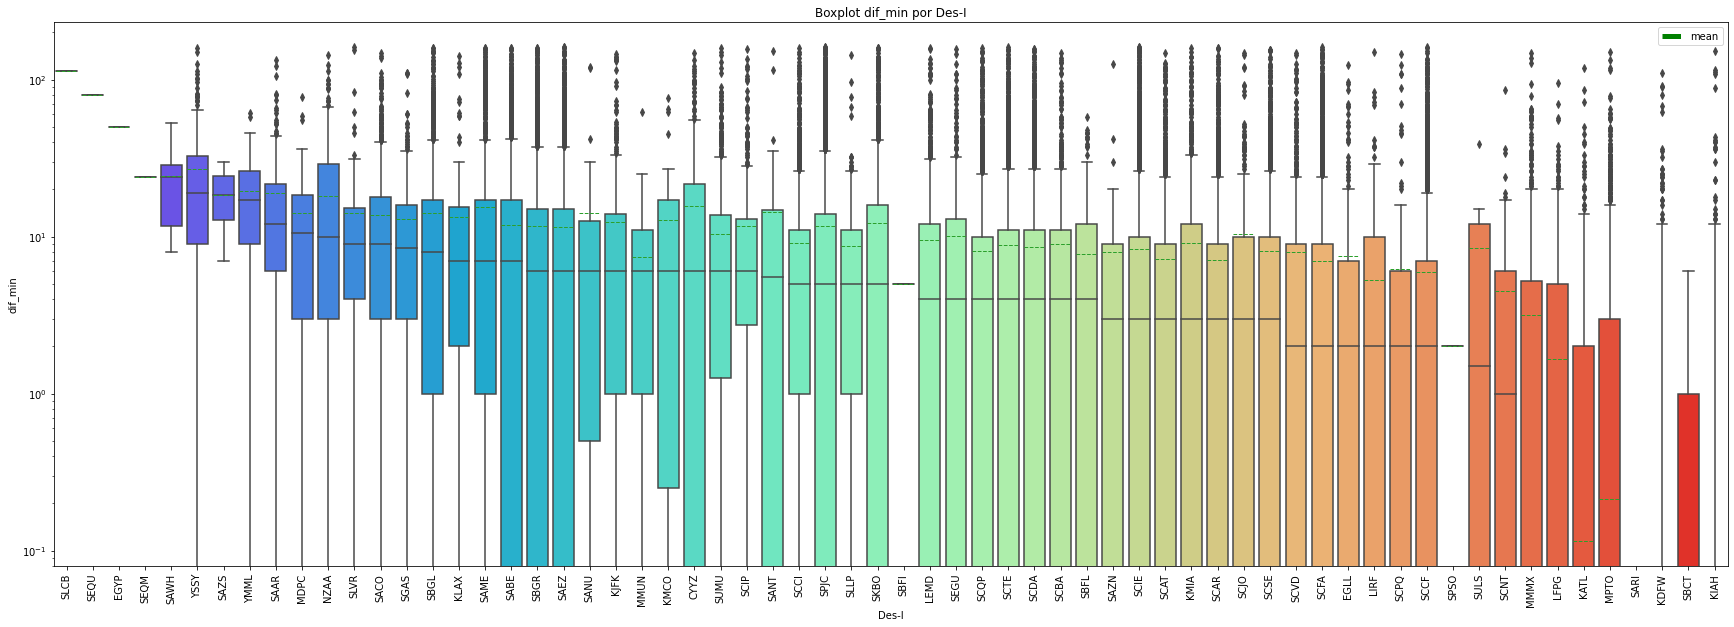

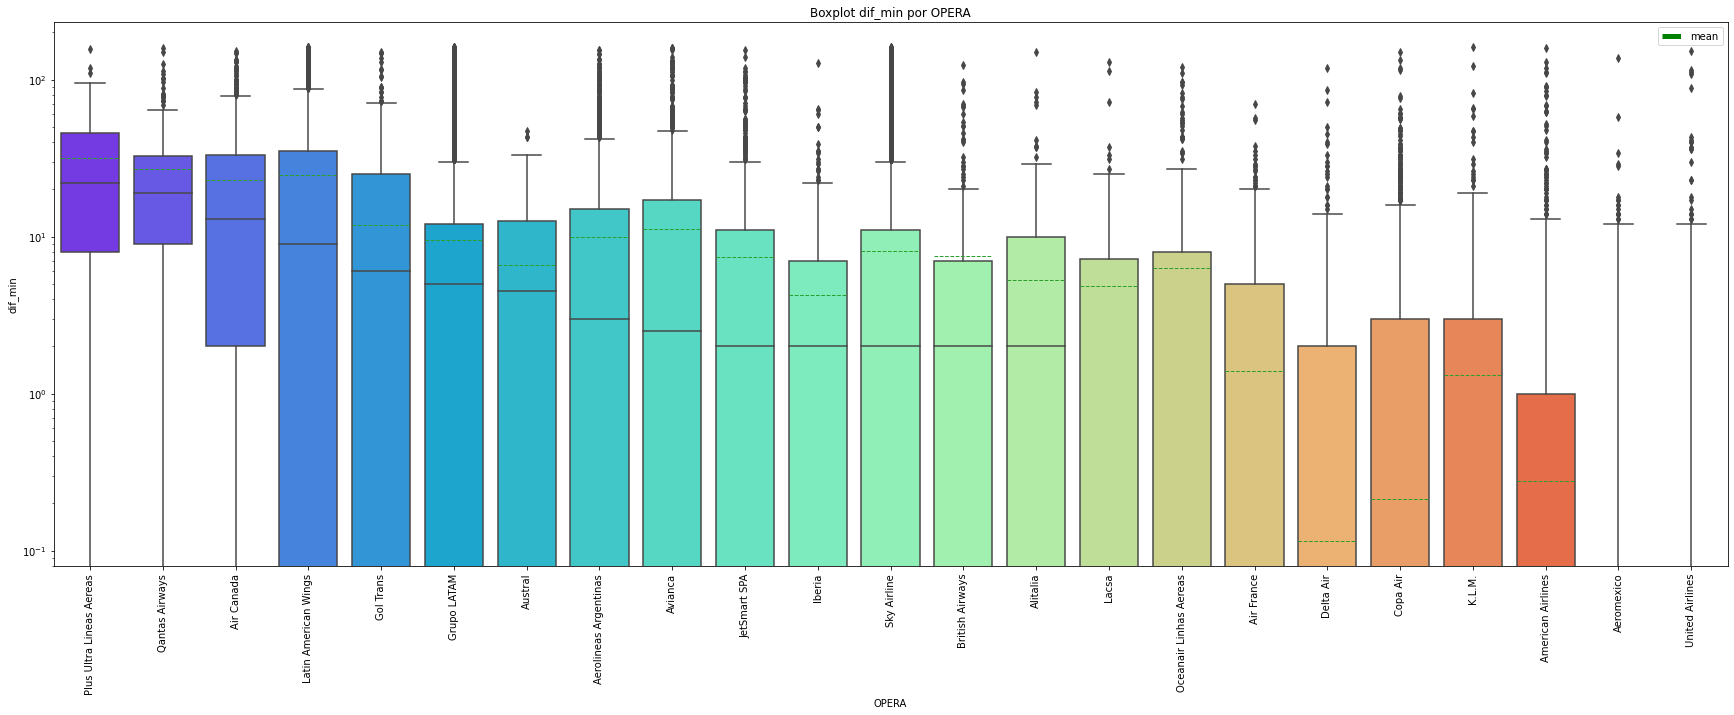

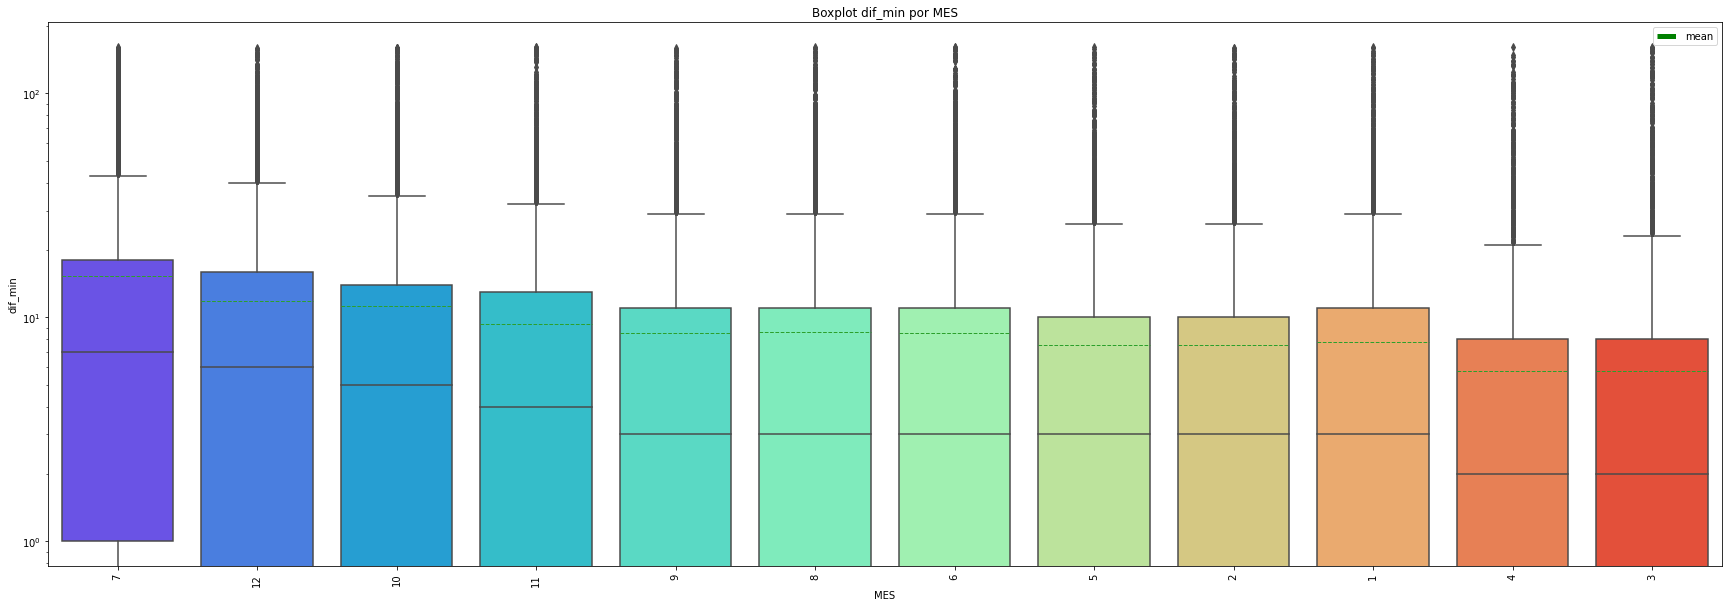

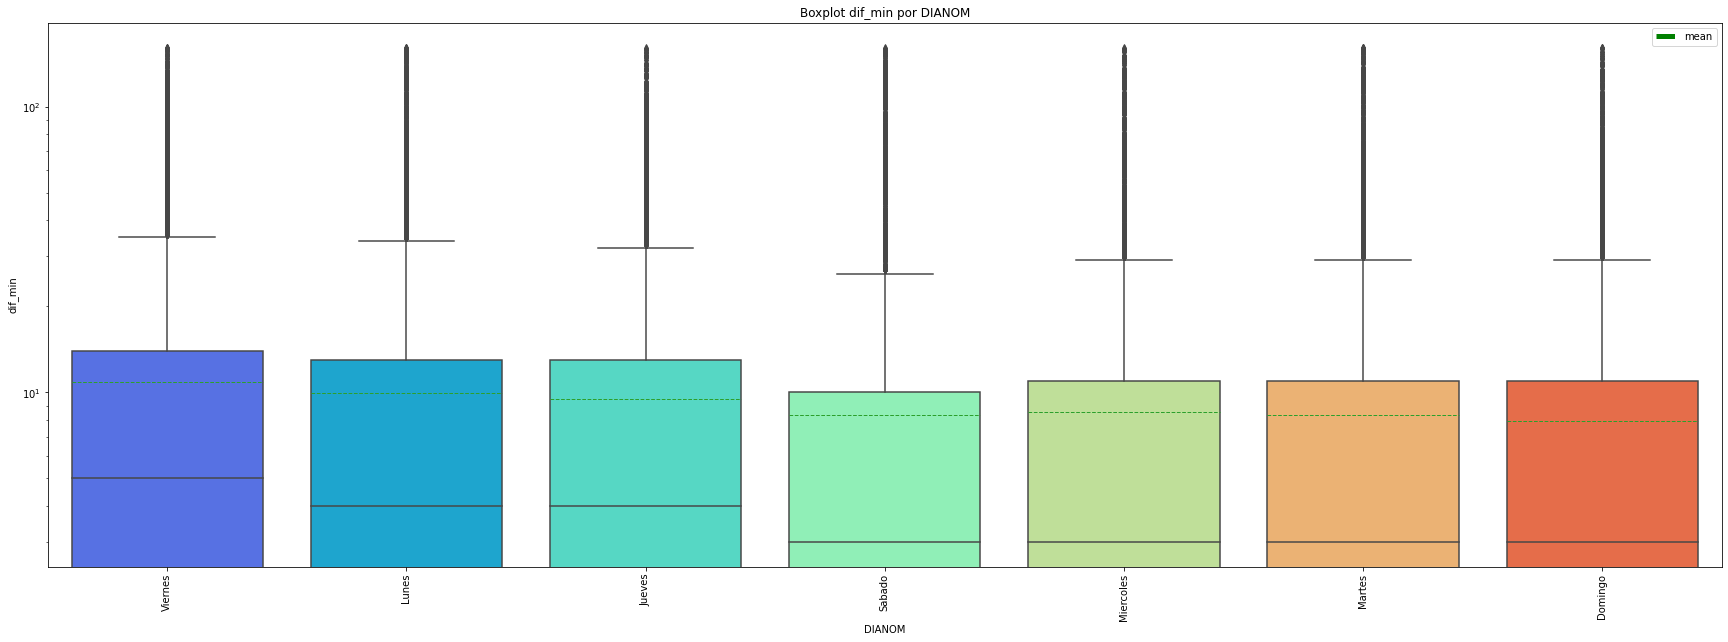

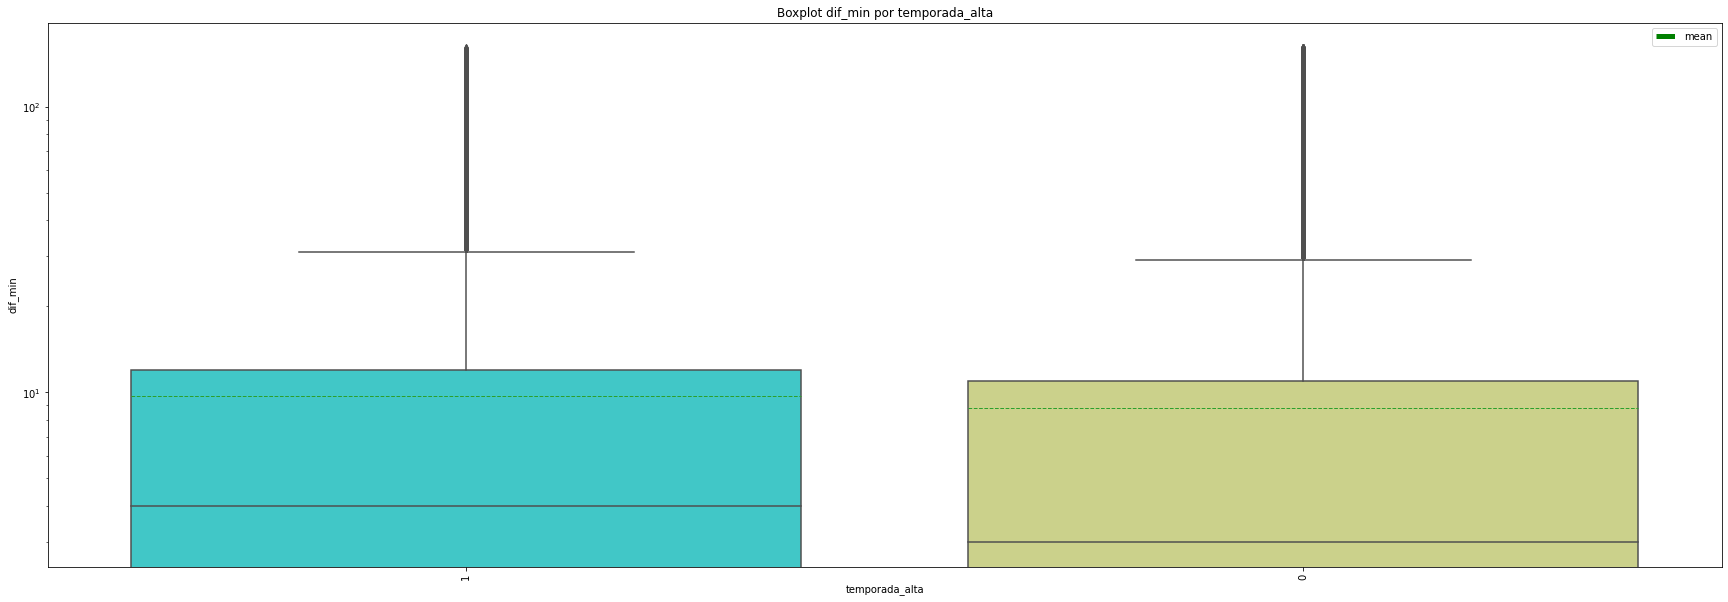

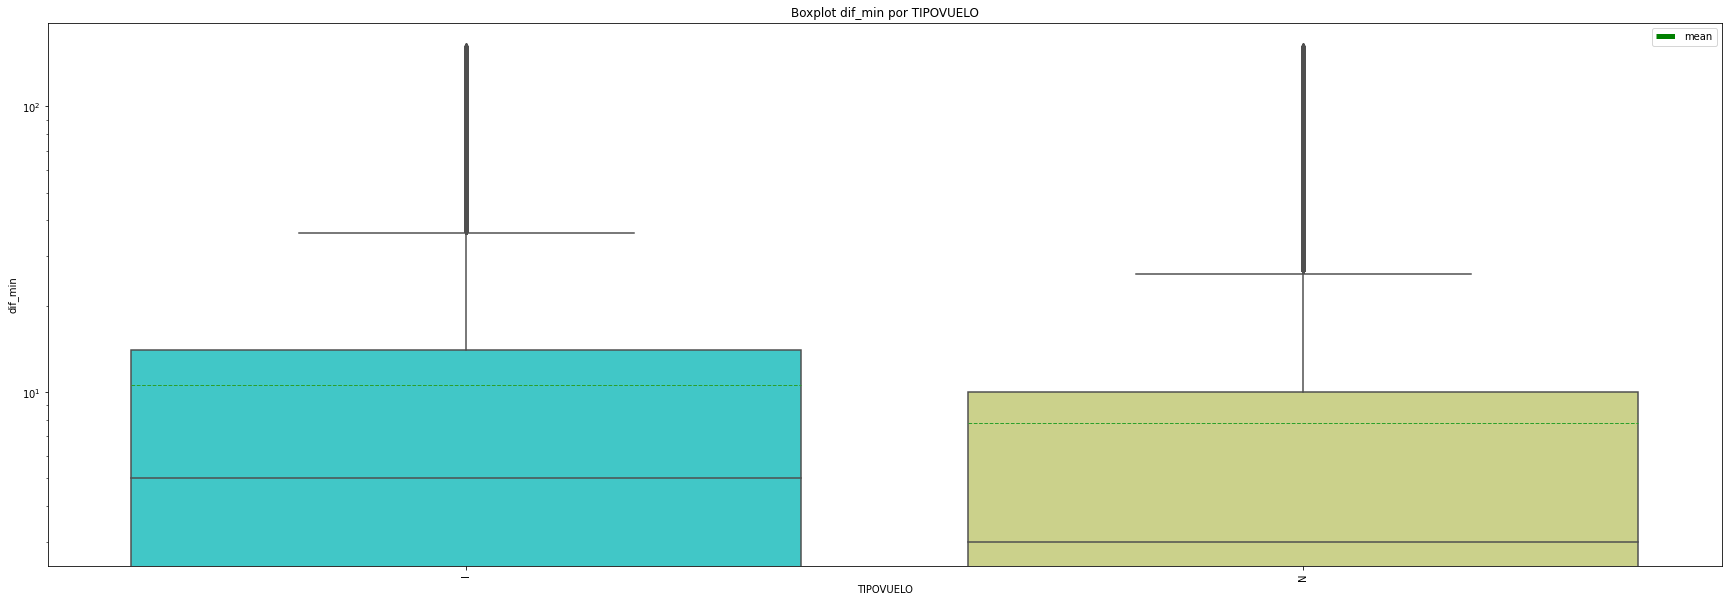

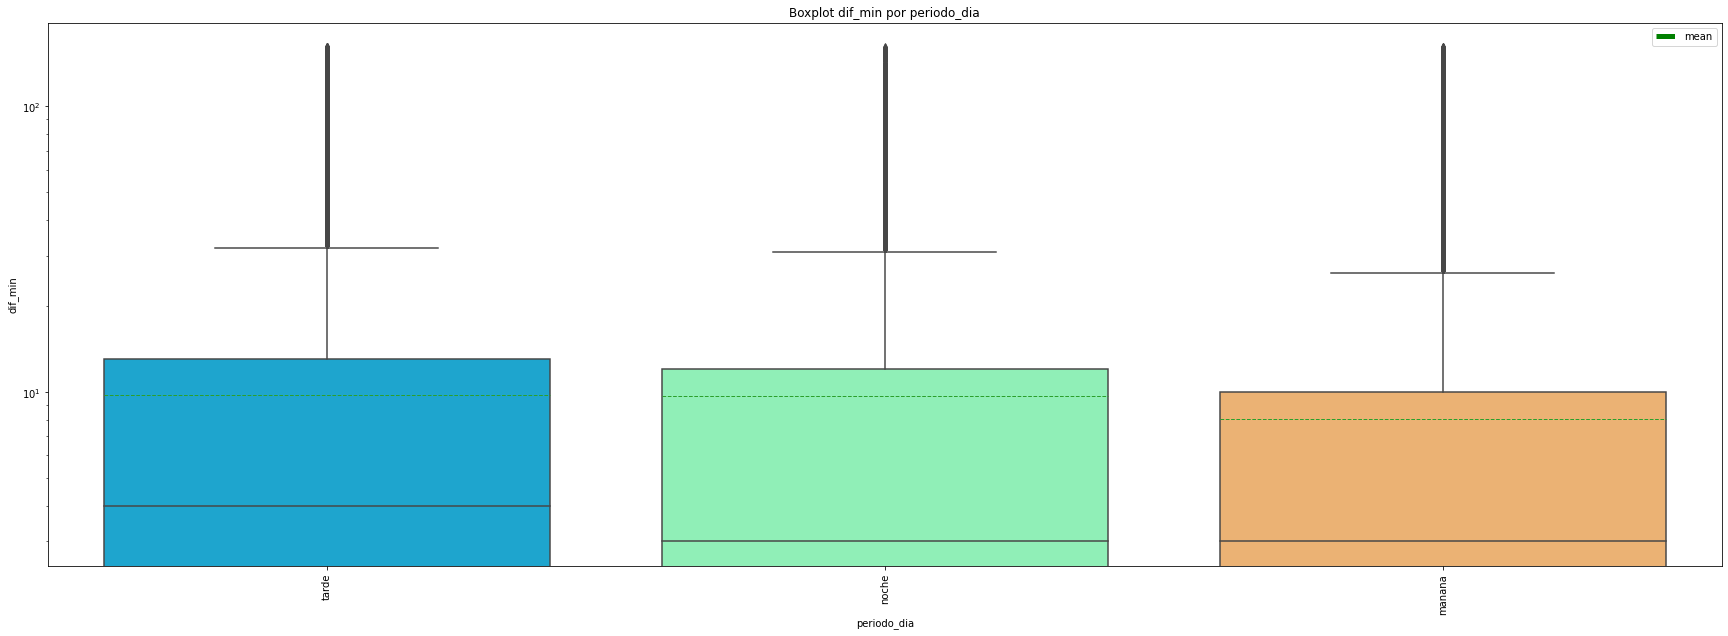

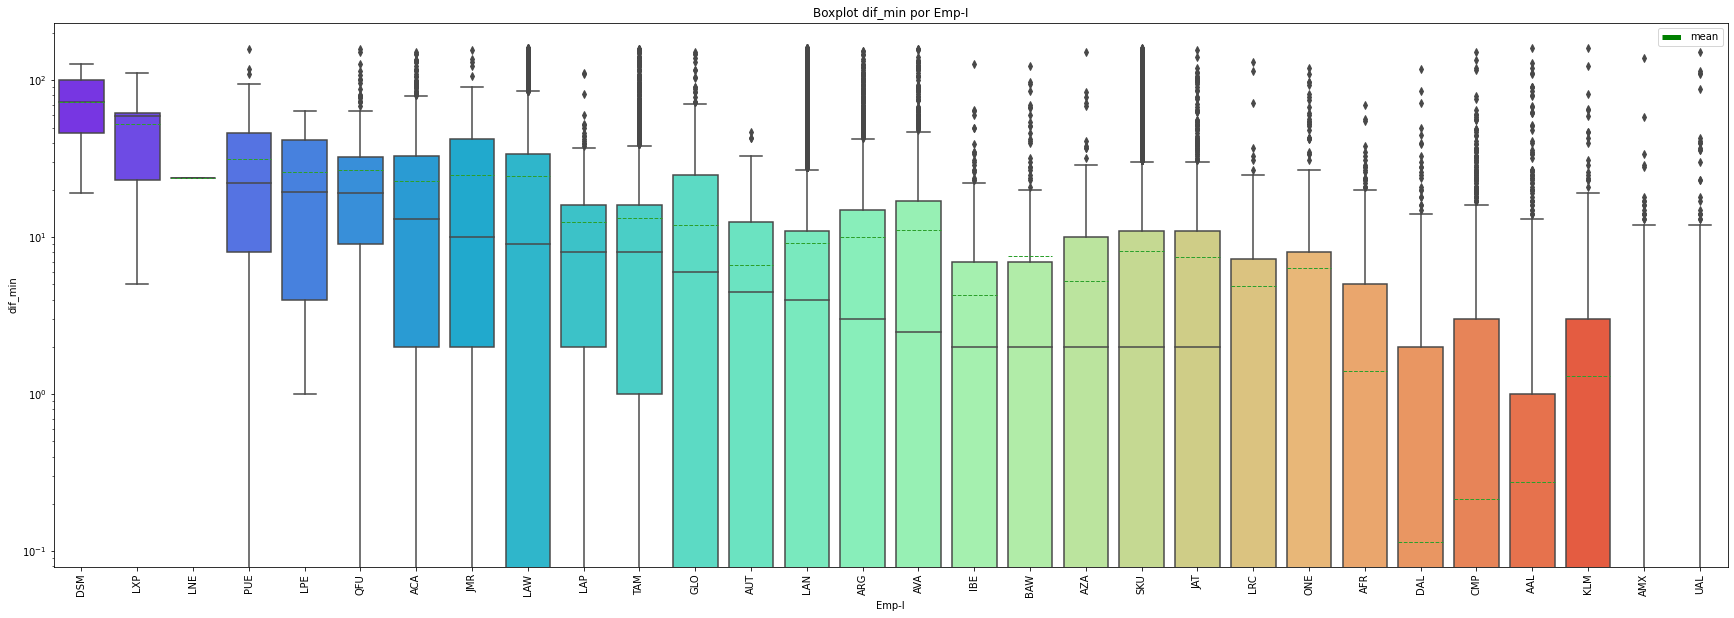

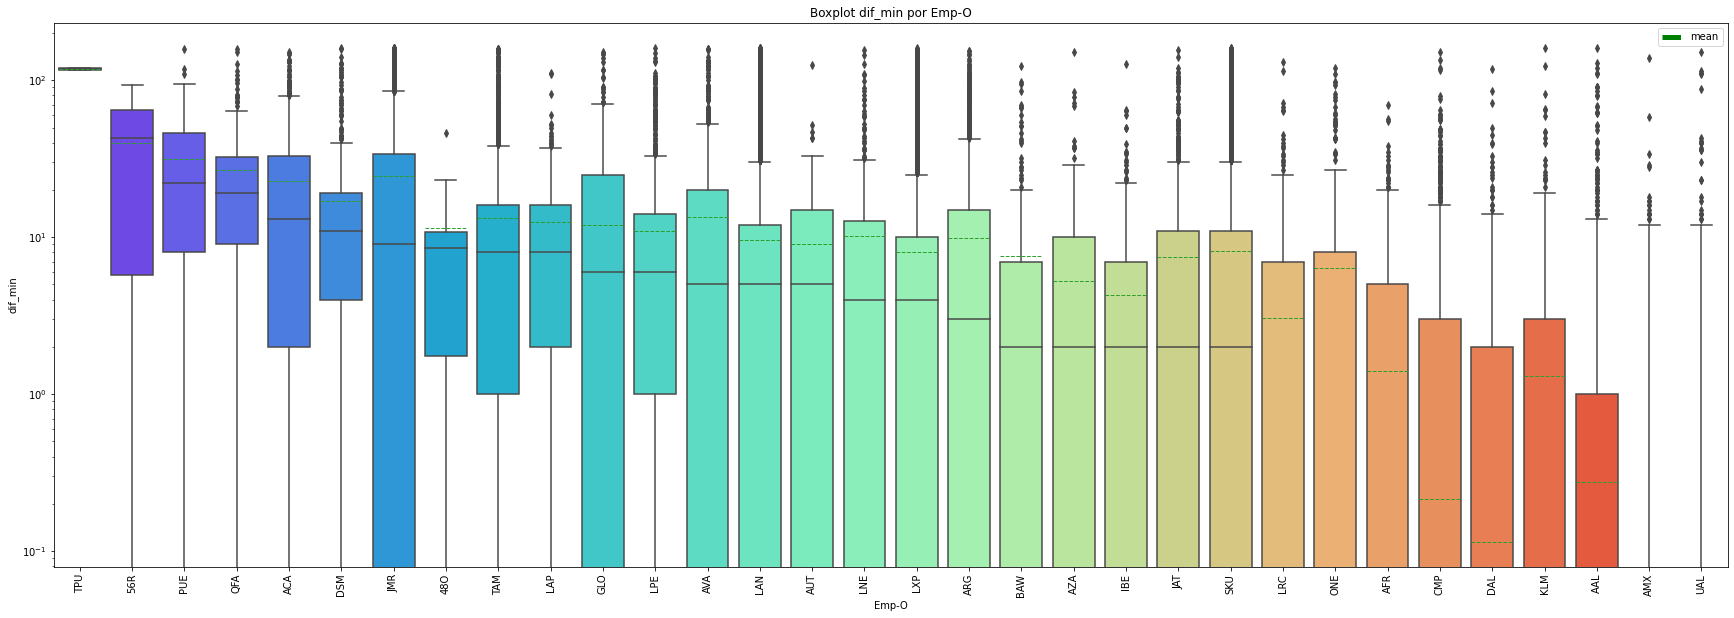

In [31]:
#Boxplots
columnas=['Des-I','OPERA','MES','DIANOM','temporada_alta','TIPOVUELO','periodo_dia','Emp-I','Emp-O']
for variable in columnas:
    rangeR=0.5
    label='SCL'
    xvalue=variable
    column='dif_min'
    title='scl_boxplot_results_'+ column +xvalue+'.png'
    #orderlabels=SCL.sort_values(by=xvalue)[xvalue].unique()
    orderlabels=SCL.groupby(by=[xvalue])[column].median().sort_values(ascending=True).iloc[::-1].index
    ax = plt.subplots(figsize=(30, 10))
    make_boxplot(SCL,label, title, column,rangeR,xvalue,orderlabels)
    #make_boxplot(SCL,label, title, column,rangeR,xvalue,orderlabels,'atraso_15')


> A pesar de que los violinplots son más informativos que los boxplots, los últimos permiten visualiza mejor los datos de SCL.

- Grafico Boxplots de **'dif_min'** por variable de interés y agrupados por **'atraso_15'**

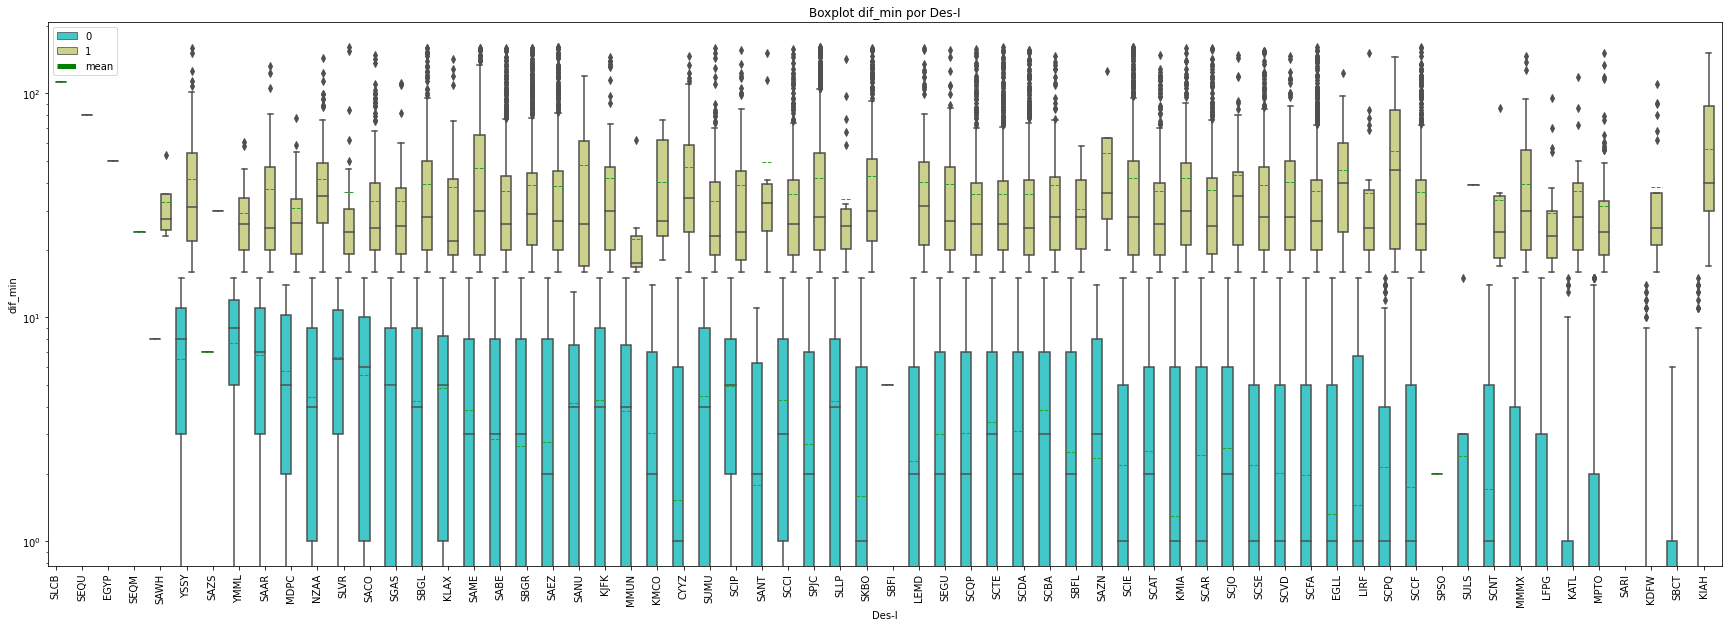

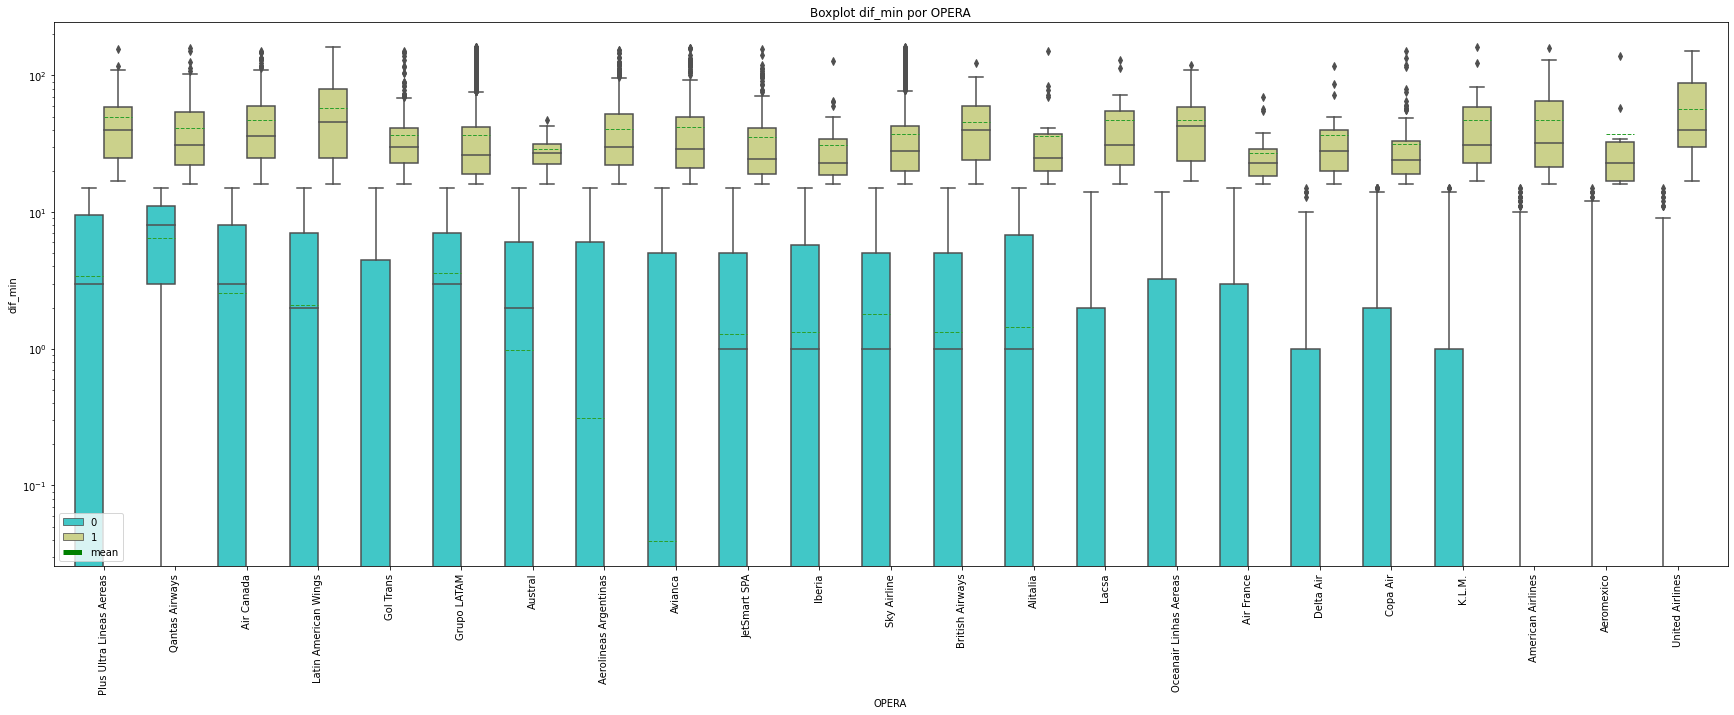

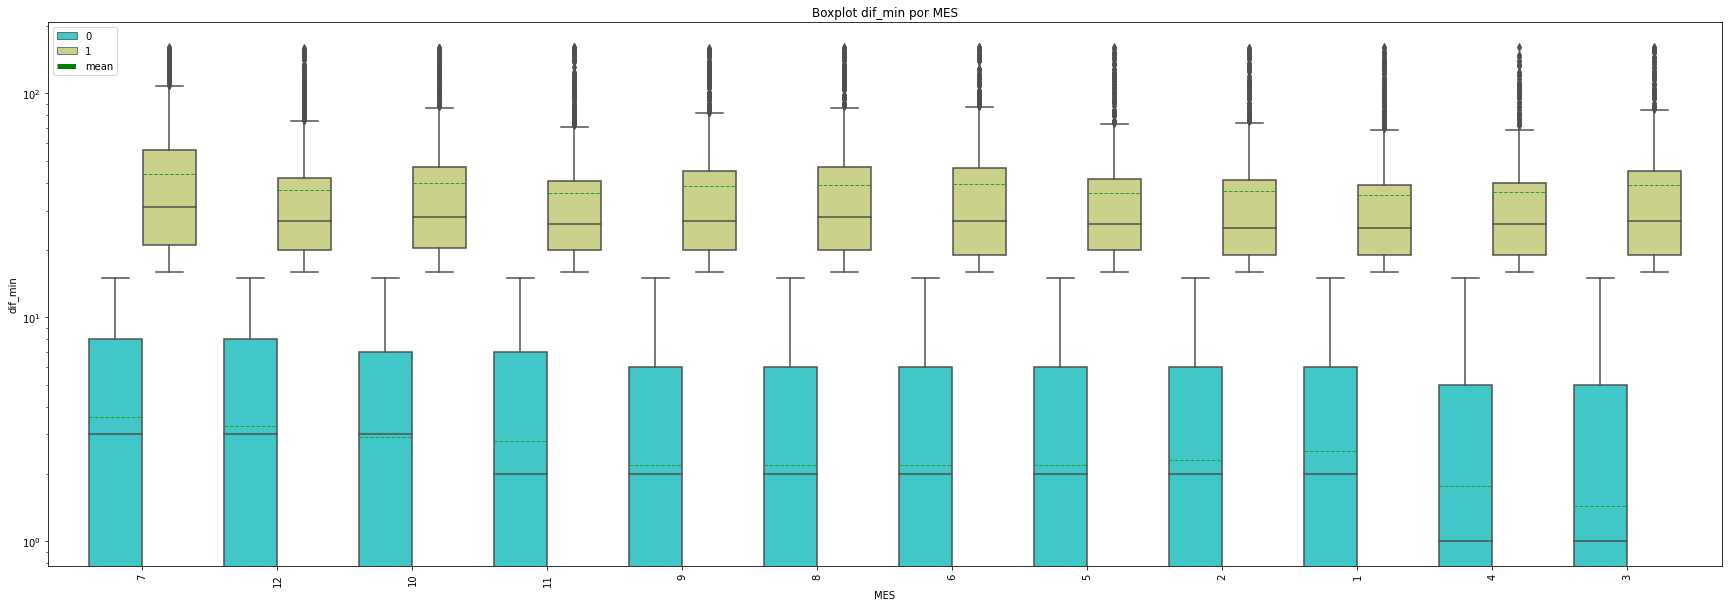

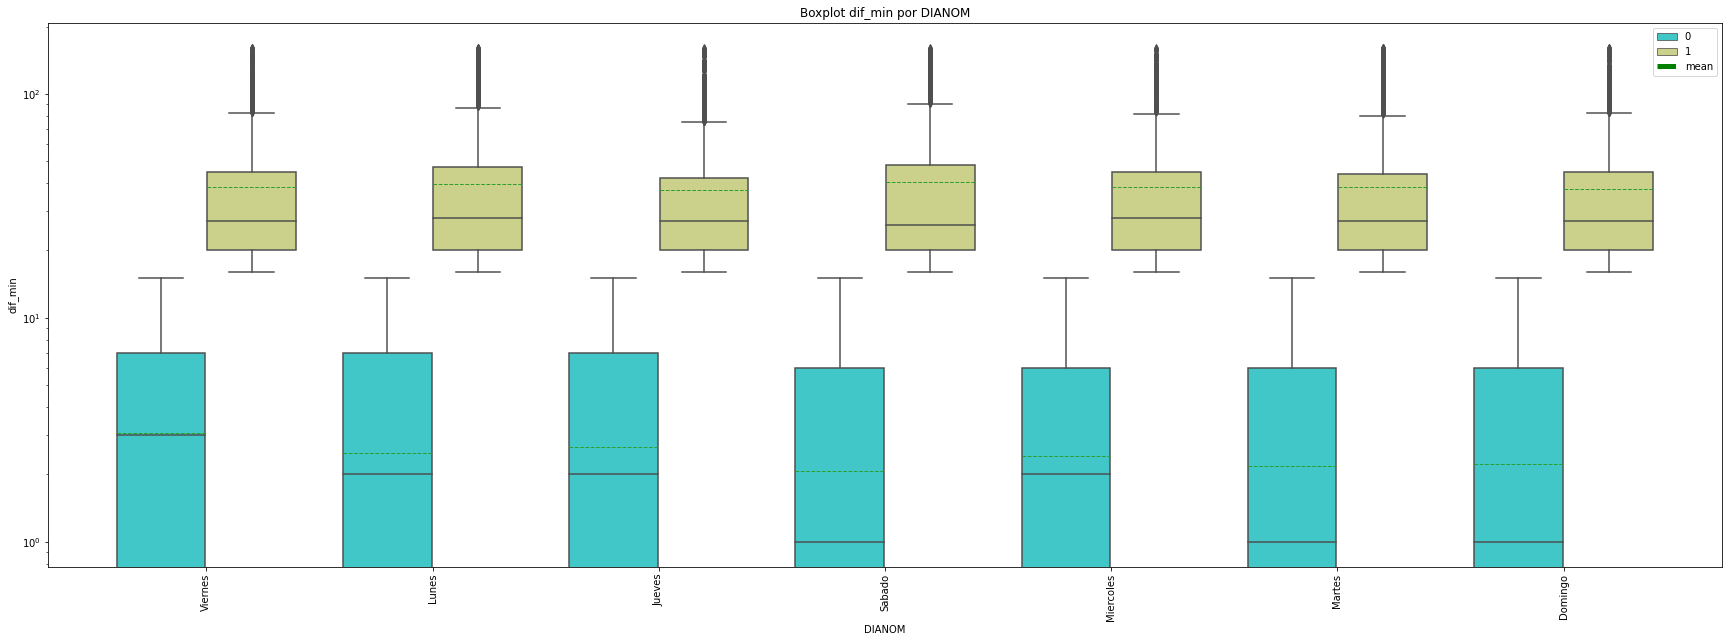

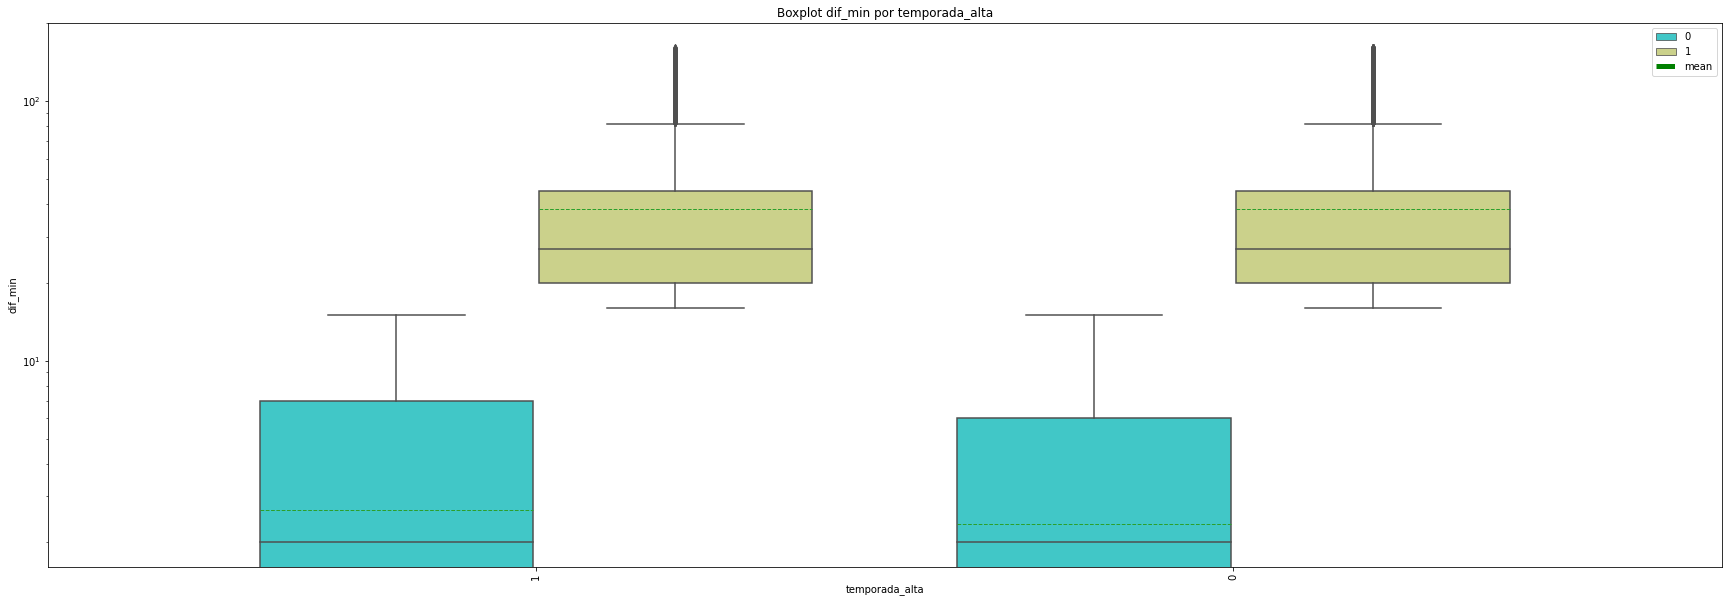

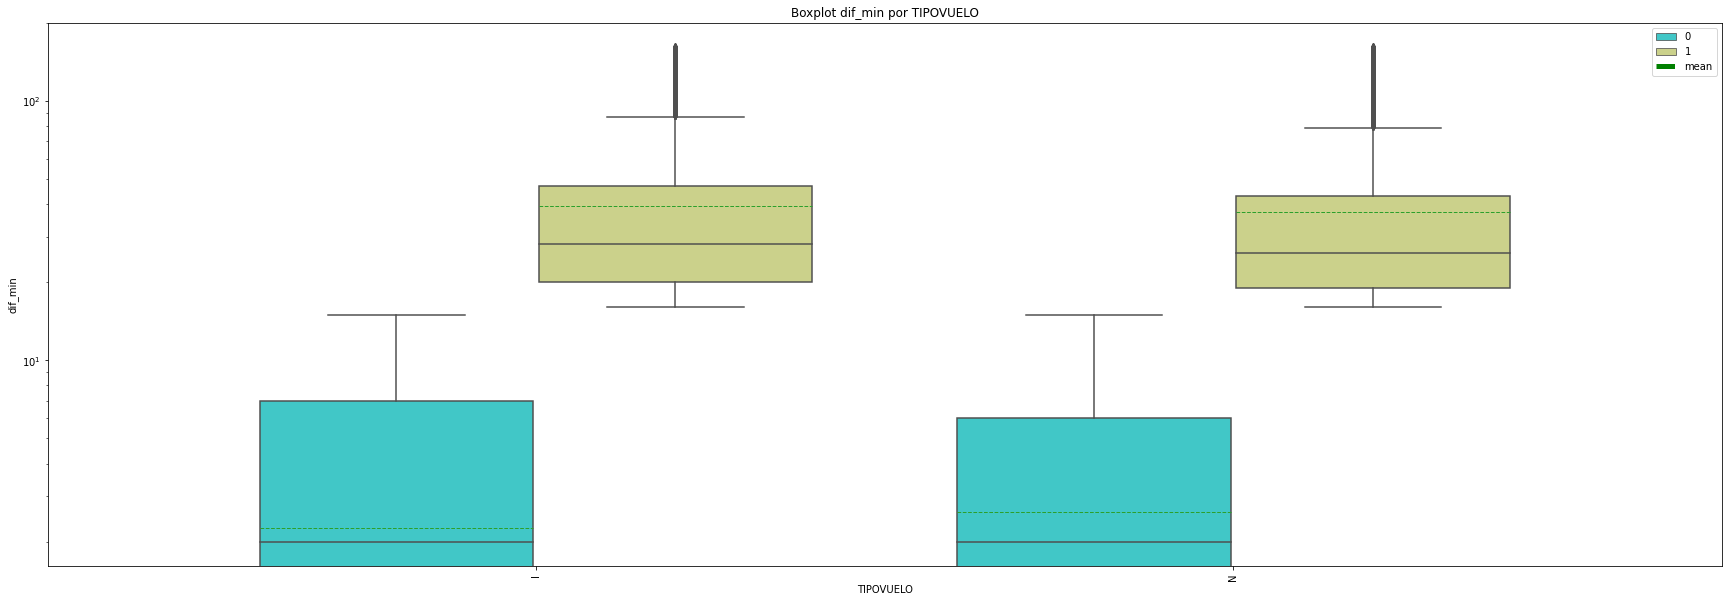

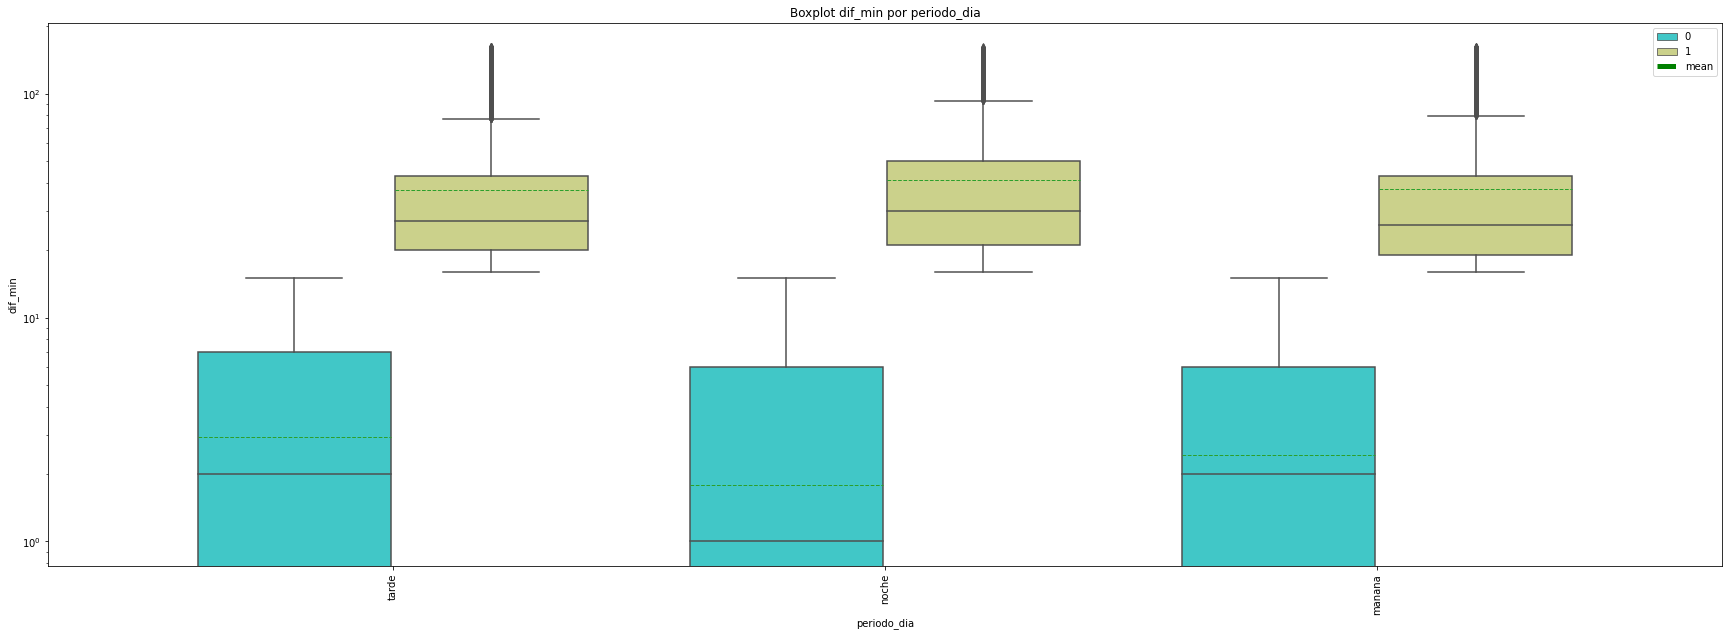

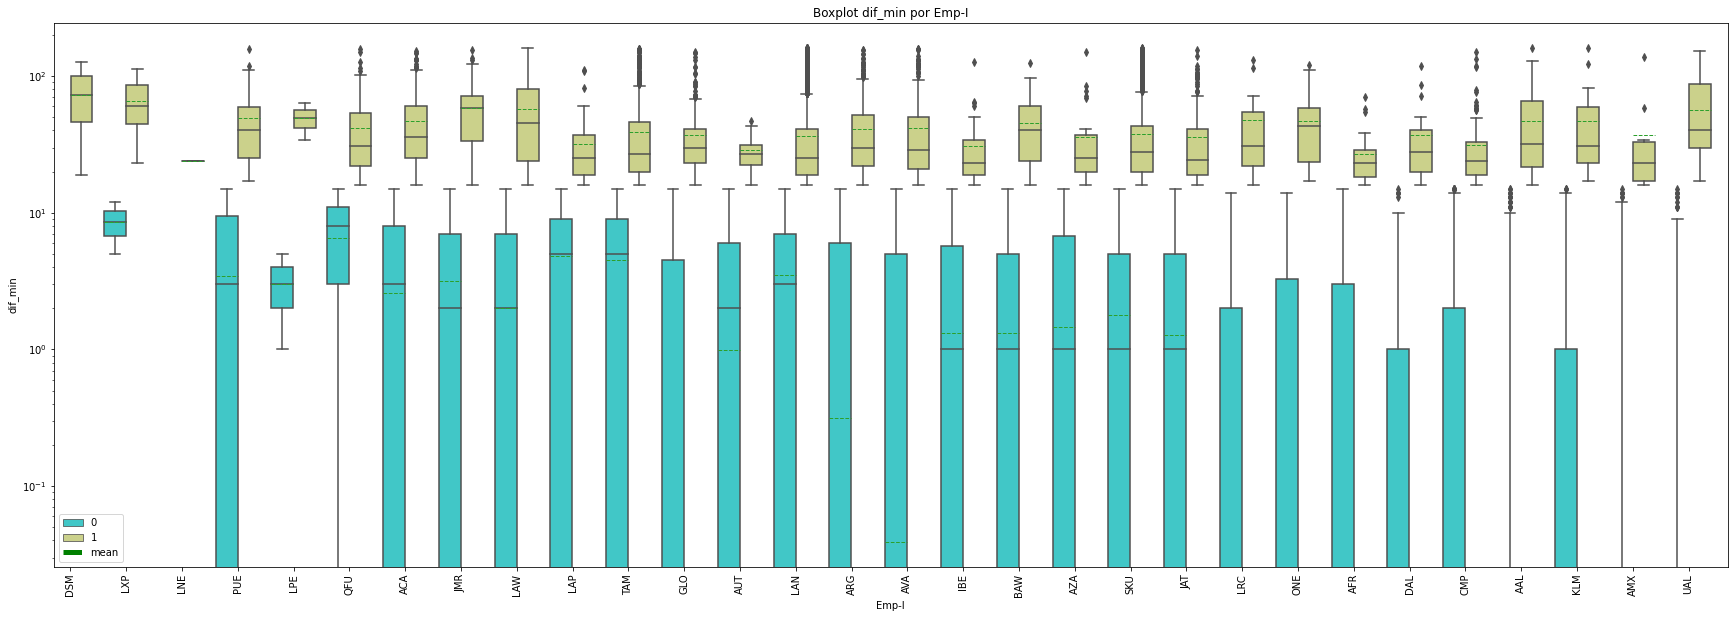

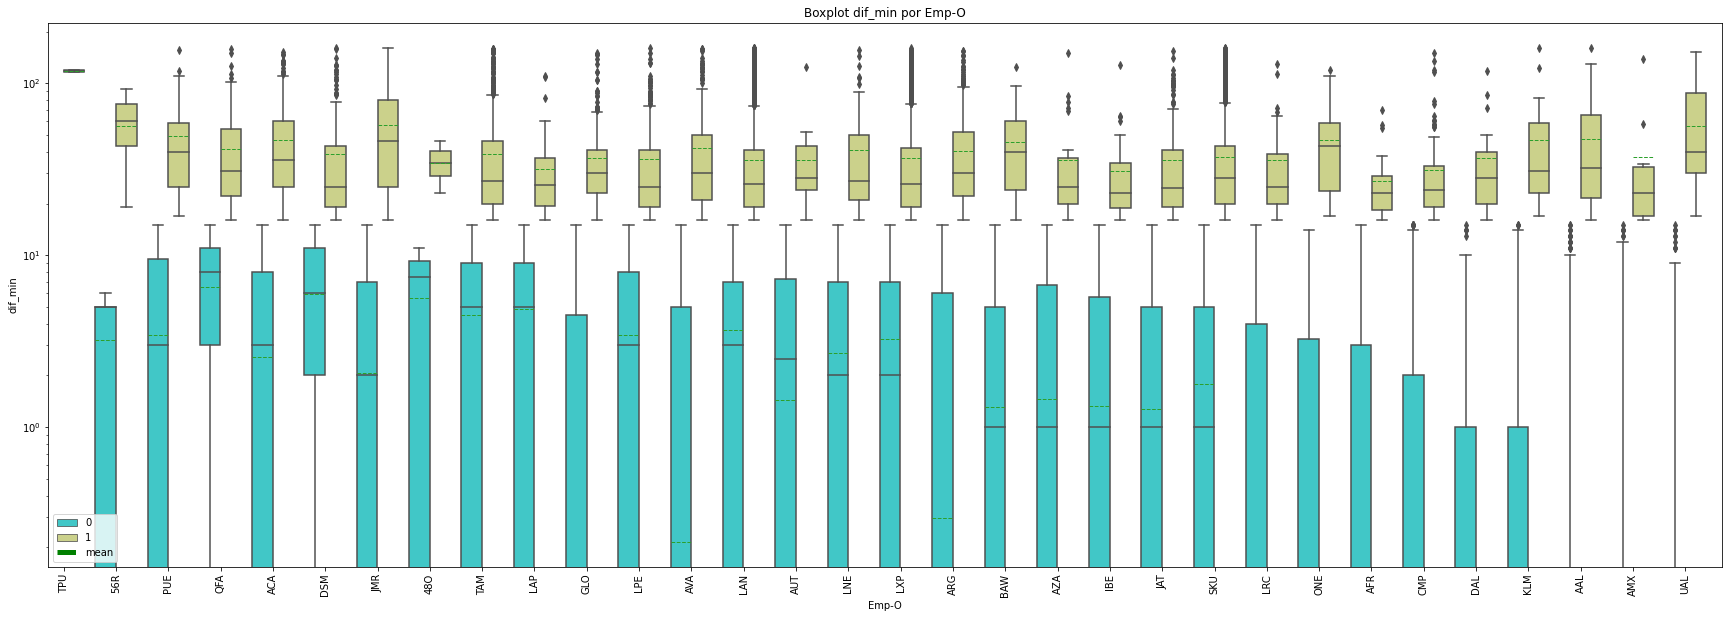

In [32]:
columnas=['Des-I','OPERA','MES','DIANOM','temporada_alta','TIPOVUELO','periodo_dia','Emp-I','Emp-O']
for variable in columnas:
    rangeR=0.5
    label='SCL'
    xvalue=variable
    column='dif_min'
    title='scl_boxplot_results_'+ column +xvalue+'.png'
    #orderlabels=SCL.sort_values(by=xvalue)[xvalue].unique()
    orderlabels=SCL.groupby(by=[xvalue])[column].median().sort_values(ascending=True).iloc[::-1].index
    ax = plt.subplots(figsize=(30, 10))
    #make_boxplot(SCL,label, title, column,rangeR,xvalue,orderlabels)
    make_boxplot(SCL,label, title, column,rangeR,xvalue,orderlabels,'atraso_15')

> La distribución de los datos varía bastante entre las variables categorica 'Des-I', 'Des-O', 'OPERA','Emp-I' y 'Emo-O', que representan ciudades de destino, aerolineas y aeropuerto

## 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

### Procesamiento de datos para entrenar modelos

In [34]:
#funcion para convertir número a DIANOM
def numbers_to_DIANOM(dia):
    switcher = {
        0: "Lunes",
        1: "Martes",
        2: "Miercoles",
        3: "Jueves",
        4: "Viernes", 
        5: "Sabado", 
        6: "Domingo",

    }
    return switcher.get(dia)
#funcion para convertir DIANOM a número de 0-6
def DIANOM_to_number(dia):
    switcher = {
        "Lunes"    :0,
        "Martes"   :1, 
        "Miercoles":2,
        "Jueves"   :3,
        "Viernes"  :4, 
        "Sabado"   :5,
        "Domingo"  :6,

    }
    return switcher.get(dia)

In [35]:
#Reviso si hay columnas duplicadas:
#Nota: previamente llegue a este paso y me di cuenta que habian filas duplicadas. Por esa razon agregue mas datos para hacer el dataset mas completo
#Los datos solo contienen DIA, MES, DIANOM de operación y no programados. Por ende agregare esa información a SCL
SCL['DIA-I']=SCL['Fecha-I'].dt.day
SCL['MES-I']=SCL['Fecha-I'].dt.month

#Agrego sufijo -O de operación a DIA y MES y DIANOM
SCL.rename(columns={"DIA": "DIA-O", "MES": "MES-O"},inplace=True)
SCL.rename(columns={"DIANOM": "DIANOM-O"},inplace=True)
#obtengo dia de la semana en formato numerico de acuerdo a fecha (Lunes=0, Domingo=6)
SCL['DIANOM-I']=SCL['Fecha-I'].dt.dayofweek
#funcion para convertir numero a dia de la semana

SCL['DIANOM-O']=SCL['DIANOM-O'].apply(DIANOM_to_number)
#transformo dia numerico a dia de semana
#SCL['DIANOM-I']=SCL['DIANUM-I'].apply(numbers_to_DIANOM)

#obtengo hora de vuelos
#SCL['Hora-I']=pd.to_datetime(SCL['Fecha-I']).dt.time
#SCL['Hora-O']=pd.to_datetime(SCL['Fecha-O']).dt.time
#del SCL['Hora-O']
#del SCL['Hora-I']
#obtengo hora de vuelos en minutos
SCL['minutos-O']=SCL['Fecha-O'].dt.hour+SCL['Fecha-O'].dt.minute
SCL['minutos-I']=SCL['Fecha-I'].dt.hour+SCL['Fecha-I'].dt.minute
#cambiar periodo dia a int 
SCL['periodo_dia'].replace({"manana": 1, 'tarde': 2, 'noche':3}, inplace=True)

#Compruebo que no hay datos nulos
if(SCL.isnull().values.any()):
    print("Hay valores nulos")
else:
    print("No hay valores nulos")
#visualizo nuevas variables
SCL.head()


No hay valores nulos


,Fecha-I,Vlo-I,Des-I,Emp-I,Fecha-O,Vlo-O,Des-O,Emp-O,DIA-O,MES-O,DIANOM-O,TIPOVUELO,OPERA,SIGLADES,temporada_alta,dif_min,atraso_15,periodo_dia,DIA-I,MES-I,DIANOM-I,minutos-O,minutos-I
0,2017-01-01 23:30:00,226,KMIA,AAL,2017-01-01 23:33:00,226,KMIA,AAL,1,1,6,I,American Airlines,Miami,1,3,0,3,1,1,6,56,53
1,2017-01-02 23:30:00,226,KMIA,AAL,2017-01-02 23:39:00,226,KMIA,AAL,2,1,0,I,American Airlines,Miami,1,9,0,3,2,1,0,62,53
2,2017-01-03 23:30:00,226,KMIA,AAL,2017-01-03 23:39:00,226,KMIA,AAL,3,1,1,I,American Airlines,Miami,1,9,0,3,3,1,1,62,53
3,2017-01-04 23:30:00,226,KMIA,AAL,2017-01-04 23:33:00,226,KMIA,AAL,4,1,2,I,American Airlines,Miami,1,3,0,3,4,1,2,56,53
4,2017-01-05 23:30:00,226,KMIA,AAL,2017-01-05 23:28:00,226,KMIA,AAL,5,1,3,I,American Airlines,Miami,1,-2,0,3,5,1,3,51,53


- Para entrenar el modelo, creo el dataframe "SCL_dummies" con variables categoricas convertidas en dummy/indicadores

In [42]:
categorical_cols=SCL.select_dtypes(['object']).columns.tolist()
categorical_cols
SCL.columns.tolist()

['Vlo-I',
 'Des-I',
 'Emp-I',
 'Vlo-O',
 'Des-O',
 'Emp-O',
 'TIPOVUELO',
 'OPERA',
 'SIGLADES']

['Fecha-I',
 'Vlo-I',
 'Des-I',
 'Emp-I',
 'Fecha-O',
 'Vlo-O',
 'Des-O',
 'Emp-O',
 'DIA-O',
 'MES-O',
 'DIANOM-O',
 'TIPOVUELO',
 'OPERA',
 'SIGLADES',
 'temporada_alta',
 'dif_min',
 'atraso_15',
 'periodo_dia',
 'DIA-I',
 'MES-I',
 'DIANOM-I',
 'minutos-O',
 'minutos-I']

In [43]:
#Para el modelo se usarán todas las columnas excepto fechas.
#Esta info esta reflejada en DIA-I,MES-I, DIANOM-I,minutos-I temporada_alta y periodo_dia
feature_cols = [
 'Vlo-I',
 'Des-I',
 'Emp-I',
 'Vlo-O',
 'Des-O',
 'Emp-O',
 'DIA-O',
 'MES-O',
 'DIANOM-O',
 'TIPOVUELO',
 'OPERA',
 'SIGLADES',
 'temporada_alta',
 'dif_min',
 'atraso_15',
 'periodo_dia',
 'DIA-I',
 'MES-I',
 'DIANOM-I',
 'minutos-O',
 'minutos-I']

In [38]:
#crear lista con variables categoricas
categorical_cols=SCL.select_dtypes(['object']).columns.tolist()
categorical_cols
#creo dataframe con variables categoricas convertidas en dummy/indicadores
SCL_dummies=pd.get_dummies(data=SCL[feature_cols].drop_duplicates(), columns=categorical_cols)
#mostrar columnas dummy 
SCL_dummies.columns
#buscar duplicados
SCL_dummies[SCL_dummies.duplicated()]


['Vlo-I',
 'Des-I',
 'Emp-I',
 'Vlo-O',
 'Des-O',
 'Emp-O',
 'TIPOVUELO',
 'OPERA',
 'SIGLADES']

Index(['DIA-O', 'MES-O', 'DIANOM-O', 'temporada_alta', 'dif_min', 'atraso_15',
       'periodo_dia', 'DIA-I', 'MES-I', 'DIANOM-I',
       ...
       'SIGLADES_San Juan, Arg.', 'SIGLADES_Santa Cruz', 'SIGLADES_Sao Paulo',
       'SIGLADES_Sydney', 'SIGLADES_Temuco', 'SIGLADES_Toronto',
       'SIGLADES_Tucuman', 'SIGLADES_Ushuia', 'SIGLADES_Valdivia',
       'SIGLADES_Washington'],
      dtype='object', length=1904)

,DIA-O,MES-O,DIANOM-O,temporada_alta,dif_min,atraso_15,periodo_dia,DIA-I,MES-I,DIANOM-I,minutos-O,minutos-I,Vlo-I_4,Vlo-I_6,Vlo-I_8,Vlo-I_10,Vlo-I_26,Vlo-I_32,Vlo-I_33,Vlo-I_43,Vlo-I_50,Vlo-I_52,Vlo-I_54,Vlo-I_86,Vlo-I_88,Vlo-I_110,Vlo-I_112,Vlo-I_200,Vlo-I_201,Vlo-I_202,Vlo-I_203,Vlo-I_207,Vlo-I_251,Vlo-I_253,Vlo-I_255,Vlo-I_265,Vlo-I_267,Vlo-I_269,Vlo-I_271,Vlo-I_273,Vlo-I_275,Vlo-I_277,Vlo-I_279,Vlo-I_281,Vlo-I_283,Vlo-I_285,Vlo-I_287,Vlo-I_289,Vlo-I_291,Vlo-I_293,Vlo-I_295,Vlo-I_297,Vlo-I_300,Vlo-I_301,Vlo-I_302,Vlo-I_304,Vlo-I_305,Vlo-I_306,Vlo-I_307,Vlo-I_308,Vlo-I_312,Vlo-I_314,Vlo-I_316,Vlo-I_318,Vlo-I_320,Vlo-I_322,Vlo-I_324,Vlo-I_326,Vlo-I_328,Vlo-I_330,Vlo-I_334,Vlo-I_336,Vlo-I_340,Vlo-I_342,Vlo-I_344,Vlo-I_346,Vlo-I_348,Vlo-I_350,Vlo-I_352,Vlo-I_366,Vlo-I_380,Vlo-I_382,Vlo-I_384,Vlo-I_386,Vlo-I_388,Vlo-I_390,Vlo-I_400,Vlo-I_402,Vlo-I_404,Vlo-I_406,Vlo-I_410,Vlo-I_414,Vlo-I_430,Vlo-I_432,Vlo-I_434,Vlo-I_439,Vlo-I_443,Vlo-I_445,Vlo-I_448,Vlo-I_449,...,Emp-O_LAN,Emp-O_LAP,Emp-O_LNE,Emp-O_LPE,Emp-O_LRC,Emp-O_LXP,Emp-O_ONE,Emp-O_PUE,Emp-O_QFA,Emp-O_SKU,Emp-O_TAM,Emp-O_TPU,Emp-O_UAL,TIPOVUELO_I,TIPOVUELO_N,OPERA_Aerolineas Argentinas,OPERA_Aeromexico,OPERA_Air Canada,OPERA_Air France,OPERA_Alitalia,OPERA_American Airlines,OPERA_Austral,OPERA_Avianca,OPERA_British Airways,OPERA_Copa Air,OPERA_Delta Air,OPERA_Gol Trans,OPERA_Grupo LATAM,OPERA_Iberia,OPERA_JetSmart SPA,OPERA_K.L.M.,OPERA_Lacsa,OPERA_Latin American Wings,OPERA_Oceanair Linhas Aereas,OPERA_Plus Ultra Lineas Aereas,OPERA_Qantas Airways,OPERA_Sky Airline,OPERA_United Airlines,SIGLADES_Antofagasta,SIGLADES_Arica,SIGLADES_Asuncion,SIGLADES_Atlanta,SIGLADES_Auckland N.Z.,SIGLADES_Balmaceda,SIGLADES_Bariloche,SIGLADES_Bogota,SIGLADES_Buenos Aires,SIGLADES_Calama,SIGLADES_Cancun,SIGLADES_Castro (Chiloe),SIGLADES_Cataratas Iguacu,SIGLADES_Ciudad de Mexico,SIGLADES_Ciudad de Panama,SIGLADES_Cochabamba,SIGLADES_Concepcion,SIGLADES_Copiapo,SIGLADES_Cordoba,"SIGLADES_Curitiba, Bra.",SIGLADES_Dallas,SIGLADES_Florianapolis,SIGLADES_Guayaquil,SIGLADES_Houston,SIGLADES_Iquique,SIGLADES_Isla de Pascua,SIGLADES_La Paz,SIGLADES_La Serena,SIGLADES_Lima,SIGLADES_Londres,SIGLADES_Los Angeles,SIGLADES_Madrid,SIGLADES_Melbourne,SIGLADES_Mendoza,SIGLADES_Miami,SIGLADES_Montevideo,SIGLADES_Neuquen,SIGLADES_Nueva York,SIGLADES_Orlando,SIGLADES_Osorno,SIGLADES_Paris,"SIGLADES_Pisco, Peru",SIGLADES_Puerto Montt,SIGLADES_Puerto Natales,SIGLADES_Puerto Stanley,SIGLADES_Punta Arenas,SIGLADES_Punta Cana,SIGLADES_Punta del Este,SIGLADES_Quito,SIGLADES_Rio de Janeiro,SIGLADES_Roma,SIGLADES_Rosario,"SIGLADES_San Juan, Arg.",SIGLADES_Santa Cruz,SIGLADES_Sao Paulo,SIGLADES_Sydney,SIGLADES_Temuco,SIGLADES_Toronto,SIGLADES_Tucuman,SIGLADES_Ushuia,SIGLADES_Valdivia,SIGLADES_Washington


> En total tenemos 1904 variables


- Reviso si las clases están balanceadas

In [44]:
SCL_dummies['atraso_15'].value_counts()
SCL_dummies['atraso_15'].count()

0    55591
1    12614
Name: atraso_15, dtype: int64

68205

> Los vuelos a tiempo o con menos de 15 minutos de atraso estan sobrerrepresentados, por lo que se necesitará aplicar alguna técnica para balancear los datos (oversampling y/o undersampling)

### Divido SCL_dummies en test y training data

- Primero creo training y test data para entrenar y testear diferentes modelos de ML.
    - X_train: Features que se utilizaran para entrenamiento
    - y_train: labels o targets que se utilizaran para entrenamiento
    - X_test: Features que se utilizaran para testear modelo
    - y_test: labels o targets que se utilizaran para entrenamiento
- Solamente los datos *_train se someteran a oversampling y undersampling

In [53]:
from sklearn.model_selection import train_test_split
# definir variable dependiente y variables indeptendientes
#Estoy eliminando dif_min porque esta altamente correlacioada con atraso_15 
SCL_train=SCL_dummies.drop(['dif_min'], axis=1).drop_duplicates().squeeze()
X = SCL_train.drop(['atraso_15'], axis=1).squeeze()
y = SCL_train[['atraso_15']].squeeze()
#30% de los datos se dejan para testear el modelo y 70% para entrenarlo. El % de labels con 1/0 de 'atraso_15'
#son proporcionales en cada split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

# dimensiones del train y test set
print("Dimensiones de train set:")
print("\tX_train: ", X_train.shape)
print("\ty_train: ", y_train.size)
print("labels: ")
pd.DataFrame(y_train.value_counts())

print("Dimensiones de test set:")
print("\tX_test: ", X_test.shape)
print("\tX_test: ", y_test.size)
print("labels: ")
pd.DataFrame(y_test.value_counts())


Dimensiones de train set:
	X_train:  (47743, 1902)
	y_train:  47743
labels: 


,atraso_15
0,38913
1,8830


Dimensiones de test set:
	X_test:  (20462, 1902)
	X_test:  20462
labels: 


,atraso_15
0,16678
1,3784


In [54]:
y_test.value_counts()[0]
y_test.value_counts()[1]
pd.DataFrame(y_test.value_counts())

16678

3784

,atraso_15
0,16678
1,3784


### Aplicamos SMOTE oversampling a los datos de entrenamiento

In [55]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)

X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train.to_numpy(), y_train)

print("Dimensiones de train set con SMOTE oversampling :")
print("\tX_train: ", X_train_SMOTE.shape)
print("\ty_train: ", y_train_SMOTE.size)
print("labels: ")
pd.DataFrame(y_train_SMOTE.value_counts())


Dimensiones de train set con SMOTE oversampling :
	X_train:  (77826, 1902)
	y_train:  77826
labels: 


,atraso_15
0,38913
1,38913


> los datos de entrenamientos con oversampling tiene 38913 rows para cada valor de atraso_15

### Aplicamos NearMiss undersampling a los datos de entrenamiento

In [56]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()

X_train_NearMiss, y_train_NearMiss = nr.fit_resample(X_train.to_numpy(), y_train)
  
print("Dimensiones de train set con SMOTE oversampling :")
print("\tX_train: ", X_train_NearMiss.shape)
print("\ty_train: ", y_train_NearMiss.size)
print("labels: ")
pd.DataFrame(y_train_NearMiss.value_counts())

Dimensiones de train set con SMOTE oversampling :
	X_train:  (17660, 1902)
	y_train:  17660
labels: 


,atraso_15
0,8830
1,8830


> los datos de entrenamientos con oversampling tiene 8830 rows para cada valor de atraso_15

### Modelos de entrenamiento

In [57]:
# importando librerias para entrenar modelos
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score 

In [58]:
#Funciones para correr los modelos: "LogisticRegression","Decision Tree", "Random Forest", 
#Gradient Boosting",y"XGBoost"
def run_LogisticRegression(X_train,y_train,X_test,parameters=None):
    # instantiate the model (using the default parameters)
    #if parameters:
    #utilizo random_state=0 para obtener resultados consistentes en caso entrenar de nuevo un modelo
    model= LogisticRegression(random_state=0)
    # fit the model with data
    model.fit(X_train,y_train)
    #prediction
    y_pred=model.predict(X_test)

    return model, y_pred

def run_RandomForestClassifier(X_train,y_train,X_test,parameters=None):
    # instantiate the model (using the default parameters)
    #if parameters:
    model= RandomForestClassifier(random_state=0)
    # fit the model with data
    model.fit(X_train,y_train)
    #prediction
    y_pred=model.predict(X_test)

    return model, y_pred

def run_DecisionTreeClassifier(X_train,y_train,X_test,parameters=None):
    # instantiate the model (using the default parameters)
    #if parameters:
    model= DecisionTreeClassifier(random_state=0)
    # fit the model with data
    model.fit(X_train,y_train)
    #prediction
    y_pred=model.predict(X_test)

    return model, y_pred

def run_GradientBoostingClassifier(X_train,y_train,X_test,parameters=None):
    # instantiate the model (using the default parameters)
    #if parameters:
    model= GradientBoostingClassifier(random_state=0)
    # fit the model with data
    model.fit(X_train,y_train)
    #prediction
    y_pred=model.predict(X_test)

    return model, y_pred

def run_XGBClassifier(X_train,y_train,X_test,parameters=None):
    # instantiate the model (using the default parameters)
    #if parameters:
    model= XGBClassifier(random_state=0)
    # fit the model with data
    model.fit(X_train,y_train)
    #prediction
    y_pred=model.predict(X_test)
    
    return model, y_pred


In [59]:
def run_GradientBoostingClassifier(X_train,y_train,X_test,parameters=None):
    # instantiate the model (using the default parameters)
    #if parameters:
    model= GradientBoostingClassifier(random_state=0)
    # fit the model with data
    model.fit(X_train,y_train)
    #prediction
    y_pred=model.predict(X_test)

    return model, y_pred



In [60]:
def run_XGBClassifier(X_train,y_train,X_test,parameters=None):
    # instantiate the model (using the default parameters)
    #if parameters:
    model= XGBClassifier(random_state=0)
    # fit the model with data
    model.fit(X_train,y_train)
    #prediction
    y_pred=model.predict(X_test)
    
    return model, y_pred


In [ ]:
#Nota: tuve que separar cada modelo en una cell diferente para que funcione el código

In [61]:
#run_LogisticRegression on normal data over
LR,y_pred_LR=run_LogisticRegression(X_train,y_train,X_test,parameters=None)

In [62]:
LR_under,y_pred_LR_under=run_LogisticRegression(X_train_NearMiss,y_train_NearMiss,X_test)

In [63]:
LR_over,y_pred_LR_over=run_LogisticRegression(X_train_SMOTE,y_train_SMOTE,X_test)

In [64]:
DT,y_pred_DT=run_DecisionTreeClassifier(X_train,y_train,X_test)


In [65]:
DT_under,y_pred_DT_under=run_DecisionTreeClassifier(X_train_NearMiss,y_train_NearMiss,X_test)

In [66]:
DT_over,y_pred_DT_over =run_DecisionTreeClassifier(X_train_SMOTE,y_train_SMOTE,X_test)

In [67]:
RF,y_pred_RF=run_RandomForestClassifier(X_train,y_train,X_test)
                                        

In [68]:
RF_under,y_pred_RF_under=run_RandomForestClassifier(X_train_NearMiss,y_train_NearMiss,X_test)

In [70]:
RF_over,y_pred_RF_over=run_RandomForestClassifier(X_train_SMOTE,y_train_SMOTE,X_test)

In [71]:
GB,y_pred_GB=run_GradientBoostingClassifier(X_train,y_train,X_test)

In [72]:
GB_under,y_pred_GB_under=run_GradientBoostingClassifier(X_train_NearMiss,y_train_NearMiss,X_test)

In [73]:
GB_over,y_pred_GB_over =run_GradientBoostingClassifier(X_train_SMOTE,y_train_SMOTE,X_test)


In [ ]:
#Los siguientes modelos estaban tomando mucho tiempo asi que no los probé en esta ocasión
#GB_over,y_pred_GB_over =run_GradientBoostingClassifier(X_train_SMOTE,y_train_SMOTE,X_test)
#XGB,y_pred_XGB =run_XGBClassifier(X_train,y_train,X_test)
#XGB_under,y_pred_XGB_under=run_XGBClassifier(X_train_NearMiss,y_train_NearMiss,X_test)
#XGB_over,y_pred_XGB_over =run_XGBClassifier(X_train_SMOTE,y_train_SMOTE,X_test)

## 5. Evalúa tu modelo. 

### ¿Por qué elegiste ese algoritmo en particular? 

- Mi elección de modelos de predicción se basa en los tipos de datos de vuelos y el balance de las clases:
    - La variable dependiente es binaria y la mayoría de las variables independentes son categóricas.
    - Las clases estan imbalanceadas, con una minoría de vuelos atrasados.
- En general, elegí 4 modelos basados en árboles porque funcionan mejor cuando hay muchas variables independientes categóricas. 
- Elegí en particular XGBoost(no pude usar este modelo por que demora mucho en mi laptop) y Gradient Boosting porque funcionan bien con clases imbalanceadas.
- Para obtener mejores resultados en los modelos que funcionan mejor con clases balanceadas, aplique oversampling de la clase minoritaria con SMOTE y undersapling de la clase mayoritaria con NearMiss
- Por último, elegí y logistic regression solamente para comparar la performance de un método no basado en árboles con el resto de las métricas.


### ¿Qué métricas usaste para evaluar esa performance y por qué?

-Para la Evaluación de modelos usé confusion matrices, curvas AUC, accuracy, y Precision-Recall-F1score para cada posible resultado de atraso_15 y para su promedio con y sin ponderar. Elegí estas métricas porque son ampliamente usadas para compara modelos de clasificación.

In [97]:
#Funciones para la Evaluación de modelos usando auc curve, confusion matrix y classification_report_table
#graficar curva AUC de todos los modelos para compararlos
def auc_plots(X_test, y_test, labels,models):
    ax = plt.subplots(figsize=(12, 5))
    from sklearn import metrics
    for label,model in zip (labels,models):
        y_pred_proba = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
        auc = metrics.roc_auc_score(y_test, y_pred_proba)
        var=plt.plot(fpr,tpr,label=label+", auc="+str(auc))
        var=plt.ylabel('TP rate')
        var=plt.xlabel('FP rate')
        var=plt.legend(loc=4)
        #var=plt.show()

#graficar confusion matrix de todos los modelos para compararlos
def confusion_matrix(y_test, y_preds, labels):
    from sklearn import metrics
    from sklearn.metrics import classification_report
    fig = plt.figure(figsize=(10, 8))
    i=1
    for label,y_pred in zip(labels,y_preds):
        cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
        #%matplotlib inline
        var=plt.subplot(4, 3, i)
        ## create heatmap
        var=sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        #var.xaxis.set_label_position("top")
        class_names=[0,1] # name  of classes
        tick_marks = np.arange(len(class_names))
        var=plt.xticks(tick_marks, class_names)
        var=plt.yticks(tick_marks, class_names)
        var=plt.tight_layout()
        var=plt.title(label)#, y=1.1)
        var=plt.ylabel('Valor real')#+ label)
        var=plt.xlabel('Predicción')# + label)
        i+=1
    plt.show()


def classification_report_table(y_test, y_preds,labels):
    from sklearn import metrics
    from sklearn.metrics import classification_report
    fig = plt.figure(figsize=(20, 20))
    i=1
    for label,y_pred in zip(labels,y_preds):
        class_report = classification_report(y_test, y_pred, output_dict=True)
        class_report = pd.DataFrame(class_report).transpose()        
        var=plt.subplot(4, 3, i)
        ## create heatmap
        var=sns.heatmap(class_report, annot=True, cmap="YlGnBu" ,fmt='g')
        var.xaxis.set_label_position("top")
        #var=var.set_xticklabels(var.get_xticklabels(), rotation=30)
        var=plt.yticks(rotation=45) 
        #var=plt.xticks(tick_marks, class_names)
        
        #var=plt.yticks(tick_marks, class_names)
        #var=plt.tight_layout()
        var=plt.title(label)
        #var=plt.ylabel('Valor real')#+ label)
        #var=plt.xlabel('Predicción')# + label)
        i+=1
    plt.show()

    #Recordatorio de Metricas:
    #Precision: What percent of your predictions were correct?
    #Precision = TP/(TP + FP)
    #Recall: What percent of the positive cases did you catch? 
    #Recall = TP/(TP+FN)
    #F1 score: A weighted harmonic mean of precision and reca
    #F1 Score = 2*(Recall * Precision) / (Recall + Precision)


###  ¿Qué performance tiene? 

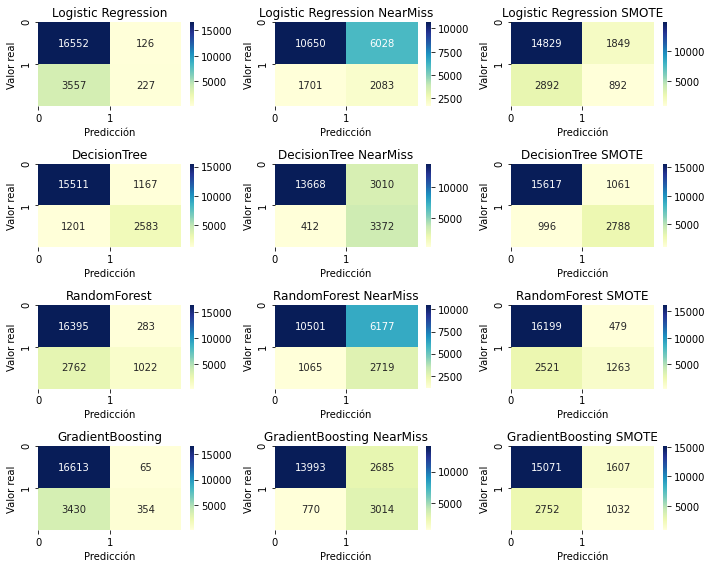

In [98]:
#Evaluación de modelos
models=[LR,LR_under,LR_over,DT,DT_under,DT_over,RF,RF_under,RF_over,GB,GB_under,GB_over]
labels=["Logistic Regression","Logistic Regression NearMiss","Logistic Regression SMOTE",
       "DecisionTree","DecisionTree NearMiss","DecisionTree SMOTE",
       "RandomForest","RandomForest NearMiss","RandomForest SMOTE","GradientBoosting","GradientBoosting NearMiss","GradientBoosting SMOTE"]
preds=[y_pred_LR,y_pred_LR_under,y_pred_LR_over,
      y_pred_DT,y_pred_DT_under,y_pred_DT_over,
      y_pred_RF,y_pred_RF_under,y_pred_RF_over,
      y_pred_GB,y_pred_GB_under,y_pred_GB_over]
confusion_matrix(y_test, preds,labels)



> Confusion matrix
- Los modelos con los datos sin balancear presentan pocos TP para la clase minoritaria, con excepción del decision tree.
- Todos modelos con los datos de la clase mayoritaria submuestreados(undersampling) tienen mayor cantidad de TP para la clase minoritaria.
- Exceptuando el modelo de Logistic regression, los modelos con los datos de la clase minoritaria sobremuestreado(oversampling) presentan mayor cantidad de TN 




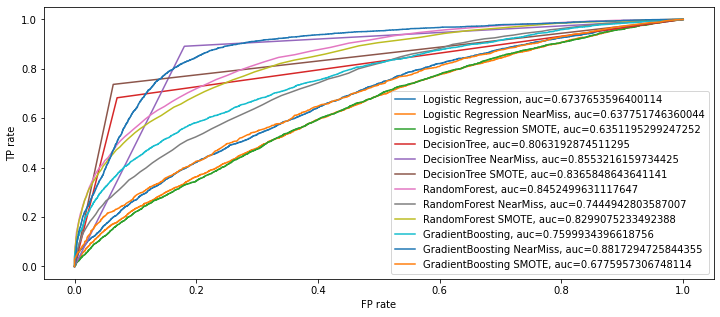

In [99]:
auc_plots(X_test, y_test, labels,models)


> AUC curve
- GradientBoosting con undersampling presenta el mayor valor auc (0.881), por lo tanto es el mejor modelo considerando esta métrica.

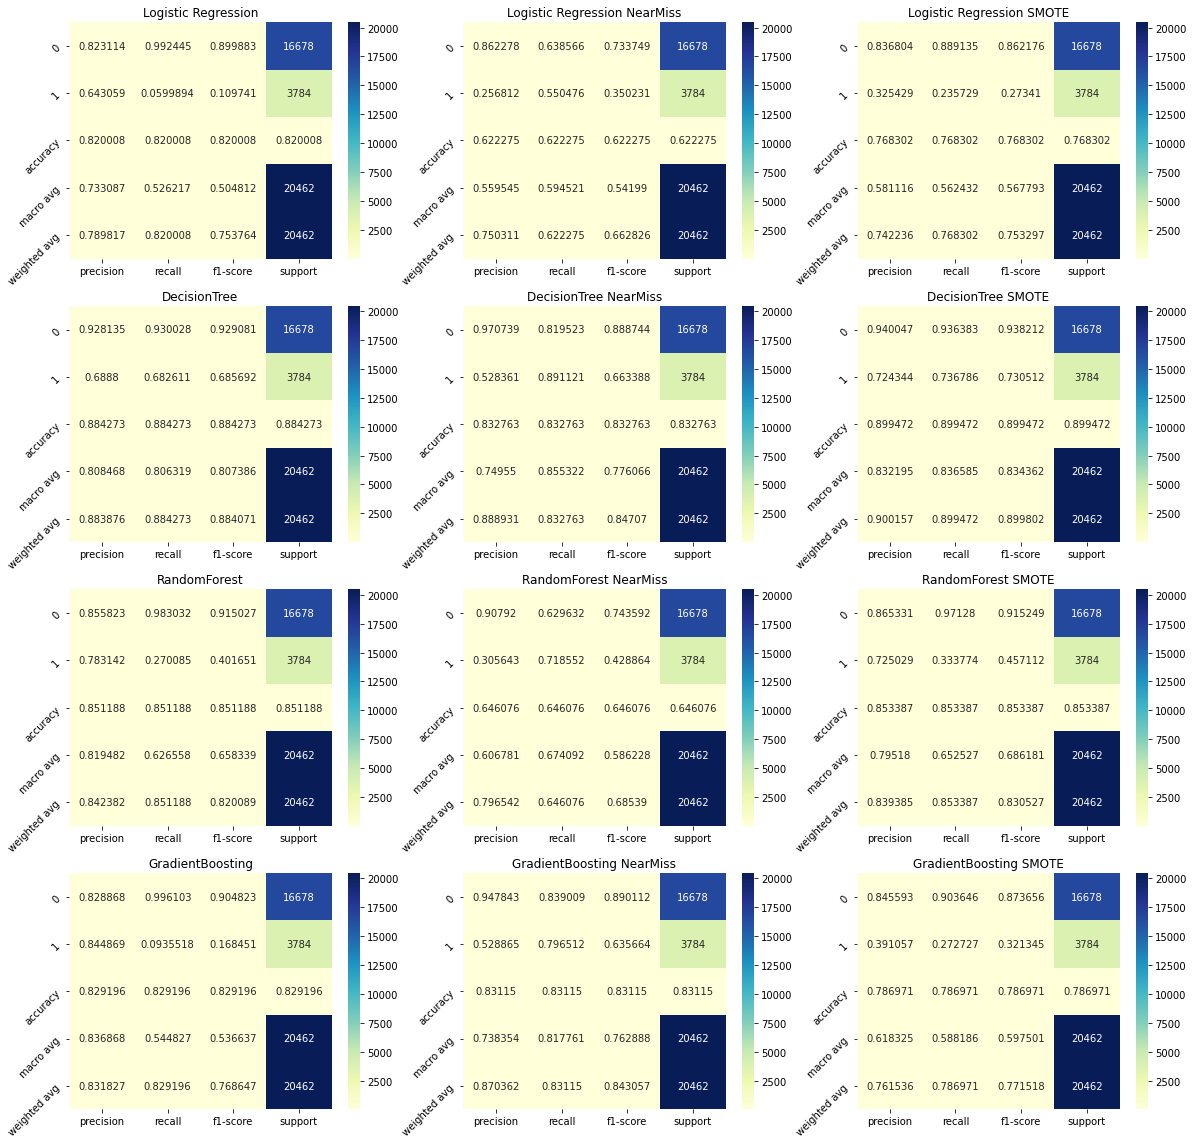

In [100]:
classification_report_table(y_test, preds,labels)

> En cuanto a precision, recall, f1 score y accuracy, Decision tree con oversampling presenta los mejores resultados al tener valores más elevados en todas las métricas evaluadas 

### ¿Qué variables son las que más influyen en la predicción? 

- Las ariables más influyentes del Decision tree con oversampling son:

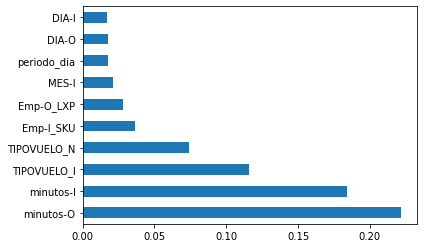

In [107]:
feat_importances = pd.Series(DT_over.feature_importances_, index=X.columns)
ax=feat_importances.nlargest(10).plot(kind='barh')

- Las variables más influyentes del Gradient Boosting con undersampling son:

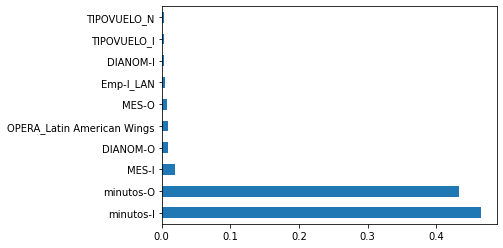

In [109]:
feat_importances = pd.Series(GB_under.feature_importances_, index=X.columns)
ax=feat_importances.nlargest(10).plot(kind='barh')

## ¿Cómo podrías mejorar la performance?
- Para mejorar la performance modificaría:
1. Datos:
    - Utilizaría más datos de vuelos atrasados, para comenzar con clases balanceados.
    - Además, incluiría vuelos fuera del aeropuerto de Santiago
2. Parámetros: 
     - Penalizaría el modelo de logistic regression con Lasso, Ridge o Elastic net.
     - haría hyperparameter tuning de cada modelo utilizado
     - probaría diferentes métodos para de hacer undersampling y oversampling
     - utilizaría un método de encoding de las variables categóricas como por ejemplo One-Hot Encoding.
3. Variables: 
    - Utilizaría Feature selection para obtener las variables más relevantes en la predicción
4. Probabilidades: 
    - Estimaría la probabilidad de atraso de cada vuelo, que no alcancé a calcular

In [ ]:
### Guardar variables en archivo en caso de necesitarlas
##import dill
##dill.dump_session('~/SCL_env.db')